<hr size="5"/>

# ADS-599 Capstone Project - Identifying Safer Pedestrian Routes in Los Angeles

**Team:** #1

**Team Members:** Leonid Shpaner, Christopher Robinson, and Jose Luis Estrada

**Date:** 08/15/2022

**Programming Language:** Python Code


**GitHub link:** https://github.com/MSADS-Capstone/navigating_crime

<hr size="5"/>

## Background <a class="anchor" id="background"></a>
Murders have spiked nearly forty percent since 2019, and violent crimes, including shootings and other assaults, have increased overall (Bura et al., 2019). Violent crimes comprise four offenses, including murder and nonnegligent manslaughter, rape, robbery, and aggravated assault. Pedestrian travel, whether for recreation or necessity, is part of everyday life for millions of urban Americans, and safety is a growing concern. Many people feel that because they are local to an area, they are fully aware of the risks associated with traveling around the area. In a large densely populated area, such as Los Angeles, California, it can be difficult even for locals to be well informed of the safety relative to all the communities which surround them. Additionally, with social and political unrest due to situations like the George Floyd killing and the supreme court decision regarding Roe vs Wade, safety, especially in urban communities, can change rapidly.

Due to the increase in violent crime, it is crucial to be aware of safety when navigating through an unfamiliar area. The goal of this project was to use data science techniques to create an application to help individuals navigate unfamiliar areas safely.

**Notebook Description**  
This notebook is comprised of data exploration phase I where the data is looked at from a preliminary assessment (encoding data types, null values, and plotting some basic bar graphs). It then moves on to data preparation where the data is preprocessed, and lastly it culminates with modeling, validation, and evaluation.

# Exploratory Data Analysis - Phase I


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/Shared drives/Capstone - Best Group/GitHub Repository/navigating_crime/Code Library

/content/drive/Shared drives/Capstone - Best Group/GitHub Repository/navigating_crime/Code Library


In [2]:
import sys
print('Python Version:', sys.version)

## Libraries <a class="anchor" id="background"></a>

In [3]:
####################################
## import the requisite libraries ##
####################################
import os
import csv
import pandas as pd
import numpy as np

# library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# import library from sci-kit learn for splitting the data
from sklearn.model_selection import train_test_split

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import miscellaneous libraries
from prettytable import PrettyTable  # for creating tables
from tabulate import tabulate        # for creating tables

####################################
## import the modeling libraries ##
####################################
import scipy as sp # for extracting pearson correlation coefficient
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics, tree
from sklearn.metrics import roc_curve, auc, mean_squared_error,\
precision_score, recall_score, f1_score, accuracy_score,\
confusion_matrix, plot_confusion_matrix, classification_report

# import library for suppressing warnings
import warnings
# suppress warnings for cleaner output
warnings.filterwarnings('ignore')
# suppress future warnings for cleaner output
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
# check current working directory
current_directory = os.getcwd()
current_directory

'/content/drive/Shared drives/Capstone - Best Group/GitHub Repository/navigating_crime/Code Library'

In [5]:
####################################
########### data paths #############
####################################

# path to data folder
data_folder = '/content/drive/Shareddrives/Capstone - Best Group/' \
            + 'GitHub Repository/navigating_crime/Data Folder/'

# path to the data file
data_file = '/content/drive/Shareddrives/Capstone - Best Group/' \
          + 'Final_Data_20220719/LA_Streets_with_Crimes_By_Division.csv'

# path to the data file
data_frame = '/content/drive/Shareddrives/Capstone - Best Group/' \
           + 'Final_Data_20220719/df.csv'

####################################
########## image paths #############
####################################

# path to the image library
eda_image_path = '/content/drive/Shareddrives/Capstone - Best Group/' \
               + 'GitHub Repository/navigating_crime/Image Folder/EDA Images'

# path to the image library
model_image_path = '/content/drive/Shareddrives/Capstone - Best Group/' \
                 + 'GitHub Repository/navigating_crime/Image Folder/' \
                 + 'Modeling Images'

####################################
###  train,val,test split paths  ###
####################################

# path to the training file
train_path = '/content/drive/Shareddrives/Capstone - Best Group/' \
           + 'GitHub Repository/navigating_crime/Data Folder/train_set.csv'

# path to the validation file
valid_path = '/content/drive/Shareddrives/Capstone - Best Group/' \
           + 'GitHub Repository/navigating_crime/Data Folder/valid_set.csv'    

# path to the validation file
test_path = '/content/drive/Shareddrives/Capstone - Best Group/' \
          + 'GitHub Repository/navigating_crime/Data Folder/test_set.csv'    


In [6]:
# read in the csv file to a dataframe using pandas
df = pd.read_csv(data_file, low_memory=False)
df.head()

,OBJECTID,Shape,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,JOIN_FID,FullName,Type,Elevation,...,LAT,LON,OBJECTID_1,APREC,PREC,AREA_1,PERIMETER,SHAPE_Leng,Shape_Length_1,Shape_Length
0,18,"(-13168057.17375, 3992141.1804500036)",1,18,1,18,-1,NaN,Alley,Unknown,...,33.7261,-118.2907,20.0,HARBOR,5.0,8.928780e+08,272451.139908,0.807721,0.807721,120.220887
1,36,"(-13180677.51995, 4031566.0669)",1,36,1,36,-1,NaN,Secondary,Surface,...,34.0205,-118.4040,17.0,PACIFIC,14.0,7.176129e+08,246934.321606,0.757182,0.757182,15.473452
2,37,"(-13180677.51995, 4031566.0669)",1,36,1,37,-1,NaN,Secondary,Surface,...,34.0205,-118.4040,17.0,PACIFIC,14.0,7.176129e+08,246934.321606,0.757182,0.757182,15.473452
3,44,"(-13160890.369035002, 4035687.0216437643)",1,43,1,44,-1,NaN,Minor,Surface,...,34.0509,-118.2265,11.0,HOLLENBECK,4.0,4.330323e+08,111317.952873,0.329096,0.329096,118.766240
4,56,"(-13165346.8195, 4030644.1469999994)",1,55,1,56,-1,NaN,Secondary,Surface,...,34.0138,-118.2663,16.0,NEWTON,13.0,2.723760e+08,81476.922847,0.241128,0.241128,9.731604


## Data Report

The data report is a first pass overview of unique IDs, zip code columns, and data types in the entire data frame. Since this function will not be re-used, it is defined and passed in only once for this first attempt in exploratory data analysis. 

In [7]:
def build_report(df):
    '''
    This function provides a comprehensive report of all ID columns, all 
    data types on every column in the dataframe, showing column names, column 
    data types, number of nulls, and percentage of nulls, respectively.
    Inputs:
        df: dataframe to run the function on
    Outputs:
        dat_type: report showing column name, data type, count of null values
                  in the dataframe, and percentage of null values in the 
                  dataframe
        report: final report as a dataframe that can be saved out to .txt file
                or .rtf file, respectively.
    '''
    # create an empty log container for appending to output dataframe 
    log_txt = []

    print(' ')
    # append header to log_txt container defined above
    log_txt.append(' ')

    print('File Contents')
    log_txt.append('File Contents')

    print(' ')
    log_txt.append(' ')
    
    print('No. of Rows in File: ' + str(f"{df.shape[0]:,}"))
    log_txt.append('No. of Rows in File: ' + str(f"{df.shape[0]:,}"))

    print('No. of Columns in File: ' + str(f"{df.shape[1]:,}"))
    log_txt.append('No. of Columns in File: ' + str(f"{df.shape[1]:,}"))
    
    print(' ')
    log_txt.append(' ')

    print('ID Column Information')
    log_txt.append('ID Column Information')

    # filter out any columns contain the 'ID' string
    id_col = df.filter(like='ID').columns
    # if there are any columns that contain the '_id' string in df
    # print the number of unique columns and get a distinct count
    # otherwise, report that these Ids do not exist.

    if df[id_col].columns.any():
        df_print = df[id_col].nunique().apply(lambda x : "{:,}".format(x))
        df_print = pd.DataFrame(df_print)
        df_print.reset_index(inplace=True)
        df_print = df_print.rename(columns={0: 'Distinct Count',
                                               'index':'ID Columns'})
        # encapsulate this distinct count within a table
        df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
        print(df_tab)
        log_txt.append(df_tab)
    else:
        df_notab = 'Street IDs DO NOT exist.'
        print(df_notab)
        log_txt.append(df_notab)
    
    print(' ')
    log_txt.append(' ')

    print('Zip Code Column Information')
    log_txt.append('Zip Code Column Information')

    # filter out any columns contain the 'Zip' string
    zip_col = df.filter(like='Zip').columns
    # if there are any columns that contain the 'Zip' string in df
    # print the number of unique columns and get a distinct count
    # otherwise, report that these Ids do not exist.

    if df[zip_col].columns.any():
        df_print = df[zip_col].nunique().apply(lambda x : "{:,}".format(x))
        df_print = pd.DataFrame(df_print)
        df_print.reset_index(inplace=True)
        df_print = df_print.rename(columns={0: 'Distinct Count',
                                               'index':'ID Columns'})
        # encapsulate this distinct count within a table
        df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
        print(df_tab)
        log_txt.append(df_tab)
    else:
        df_notab = 'Street IDs DO NOT exist.'
        print(df_notab)
        log_txt.append(df_notab)

    print(' ')
    log_txt.append(' ')

    print('Date Column Information')
    log_txt.append('Date Column Information')

    # filter out any columns contain the 'Zip' string
    date_col = df.filter(like='Date').columns
    # if there are any columns that contain the 'Zip' string in df
    # print the number of unique columns and get a distinct count
    # otherwise, report that these Ids do not exist.

    if df[date_col].columns.any():
        df_print = df[date_col].nunique().apply(lambda x : "{:,}".format(x))
        df_print = pd.DataFrame(df_print)
        df_print.reset_index(inplace=True)
        df_print = df_print.rename(columns={0: 'Distinct Count',
                                               'index':'ID Columns'})
        # encapsulate this distinct count within a table
        df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
        print(df_tab)
        log_txt.append(df_tab)
    else:
        df_notab = 'Street IDs DO NOT exist.'
        print(df_notab)
        log_txt.append(df_notab)

    print(' ')
    log_txt.append(' ')

    print('Column Data Types and Their Respective Null Counts')
    log_txt.append('Column Data Types and Their Respective Null Counts')

    # Features' Data Types and Their Respective Null Counts
    dat_type = df.dtypes

    # create a new dataframe to inspect data types
    dat_type = pd.DataFrame(dat_type)

    # sum the number of nulls per column in df
    dat_type['Null_Values'] = df.isnull().sum()

    # reset index w/ inplace = True for more efficient memory usage
    dat_type.reset_index(inplace=True)

    # percentage of null values is produced and cast to new variable
    dat_type['perc_null'] = round(dat_type['Null_Values'] / len(df)*100,0)
    
    # columns are renamed for a cleaner appearance
    dat_type = dat_type.rename(columns={0:'Data Type',
                                          'index': 'Column/Variable',
                                          'Null_Values': '# of Nulls',
                                          'perc_null': 'Percent Null'})

    # sort null values in descending order
    data_types = dat_type.sort_values(by=['# of Nulls'], ascending=False)
    
    # output data types (show the output for it)
    data_types = tabulate(data_types, headers='keys', tablefmt='psql')
    print(data_types)
    
    log_txt.append(data_types)
    report = pd.DataFrame({'LA City Walking Streets With Crimes Data Report'
                          :log_txt})
    return dat_type, report

In [8]:
# pass the build_report function to a new variable named report
data_report = build_report(df)

## DEFINING WHAT GETS SENT OUT

# save report to .txt file
data_report[1].to_csv(data_folder + '/Reports/data_report.txt', 
              index=False, sep="\t",
              quoting=csv.QUOTE_NONE, quotechar='', escapechar='\t')

# # save report to .rtf file
data_report[1].to_csv(data_folder +'/Reports/data_report.rtf', 
              index=False, sep="\t",
              quoting=csv.QUOTE_NONE, quotechar='', escapechar='\t')

 
File Contents
 
No. of Rows in File: 183,362
No. of Columns in File: 81
 
ID Column Information
+----+--------------+------------------+
|    | ID Columns   | Distinct Count   |
|----+--------------+------------------|
|  0 | OBJECTID     | 183,362          |
|  1 | TARGET_FID   | 36,969           |
|  2 | TARGET_FID_1 | 183,362          |
|  3 | JOIN_FID     | 490              |
|  4 | SourceID     | 36,593           |
|  5 | StreetOID    | 36,969           |
|  6 | OBJECTID_1   | 21               |
+----+--------------+------------------+
 
Zip Code Column Information
+----+--------------+------------------+
|    | ID Columns   |   Distinct Count |
|----+--------------+------------------|
|  0 | Zip_L        |              134 |
|  1 | Zip_R        |              135 |
+----+--------------+------------------+
 
Date Column Information
+----+--------------+------------------+
|    | ID Columns   |   Distinct Count |
|----+--------------+------------------|
|  0 | UpdateDate   |     

In [9]:
# access data types from build_report() function
data_types = data_report[0]

# store data types in a .txt file in working directory for later use/retrieval
data_types.to_csv(data_folder + 'data_types.csv', index=False)
# subset of only numeric features
data_subset_num = data_types[(data_types['Data Type']=='float64') | \
                             (data_types['Data Type']=='int64')]

# subset of only rows that are fully null
data_subset_100 = data_types[data_types['Percent Null'] == 100]
# list these rows
data_subset_100 = data_subset_100['Column/Variable'].to_list()
print('The following columns contain all null rows:', data_subset_100, '\n')

# subsetting dataframe based on values that are not 100% null
data_subset = data_subset_num[data_subset_num['Percent Null'] < 100]

# list these rows
data_subset = data_subset['Column/Variable'].to_list()
df_subset = df[data_subset]

# dropping columns from this dataframe subset, such that the histogram
# that will be plotted below does not show target column(s)
df_crime_subset = df_subset.drop(columns=['Crm_Cd', 'Crm_Cd_1', 'Crm_Cd_2'])
# print columns of dataframe subset
print('The following columns remain in the subset:', '\n')
df_subset.columns

The following columns contain all null rows: ['StPreMod', 'StPostDir', 'StPostMod', 'MSAG_LCity', 'MSAG_RCity', 'MSAG_LESN', 'MSAG_RESN', 'Crm_Cd_4'] 

The following columns remain in the subset: 



Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'JOIN_FID', 'From_L', 'From_R', 'To_L', 'To_R', 'Zip_L', 'Zip_R',
       'Accuracy', 'Crime_Cost', 'StreetOID', 'Field1', 'DR_NO', 'TIME_OCC',
       'AREA', 'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd', 'Vict_Age', 'Premis_Cd',
       'Weapon_Used_Cd', 'Crm_Cd_1', 'Crm_Cd_2', 'Crm_Cd_3', 'LAT', 'LON',
       'OBJECTID_1', 'PREC', 'AREA_1', 'PERIMETER', 'SHAPE_Leng',
       'Shape_Length_1', 'Shape_Length'],
      dtype='object')

## Plots

### Histogram Distributions

Histogram distributions are plotted for the entire dataframe where numeric features exist. Axes labels are not passed in, since the `df.hist()` function is a first pass effort to elucidate the shape of each feature from a visual standpoint alone. Further analysis for features of interest provides more detail.

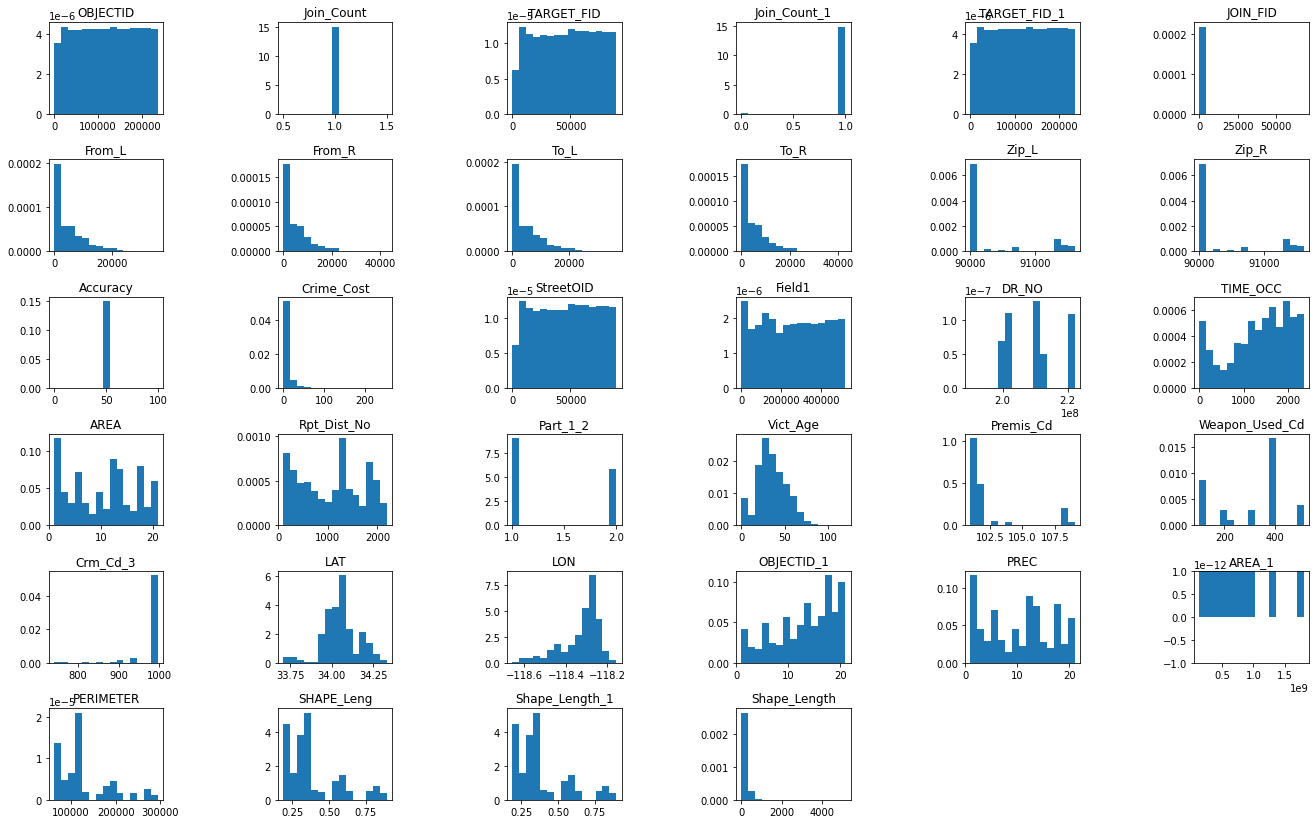

In [10]:
# create histograms for development data to inspect distributions
fig1 = df_crime_subset.hist(figsize=(25,12), grid=False, density=True, bins=15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, 
                    top=1, wspace=1.0, hspace=0.5)
plt.savefig(eda_image_path + '/histogram.png', bbox_inches = 'tight')
plt.show()

### Boxplot Distributions

Inpsecting boxplots of various columns of interest can help shed more light on their respective distributions. A pre-defined plotting function is called from the `functions.py` library to carry this out.

In [11]:
# import boxplot function
from functions import sns_boxplot


Summarizing Vict_Age
The first quartile is 24.0. 
The third quartile is 46.0. 
The IQR is 22.0.
The mean is 34.51.
The standard deviation is 16.86.
The median is 33.0.
The distribution is positively skewed.


Summarizing Weapon_Used_Cd
The first quartile is 200.0. 
The third quartile is 400.0. 
The IQR is 200.0.
The mean is 311.94.
The standard deviation is 137.9.
The median is 400.0.
The distribution is negatively skewed.


Summarizing AREA
The first quartile is 4.0. 
The third quartile is 15.0. 
The IQR is 11.0.
The mean is 10.27.
The standard deviation is 6.26.
The median is 12.0.
The distribution is negatively skewed.



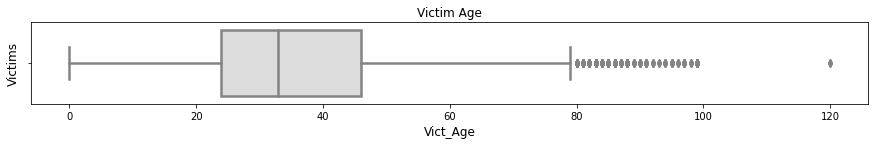

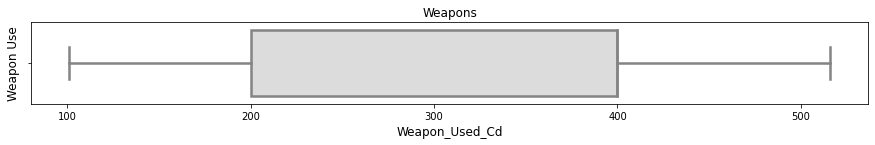

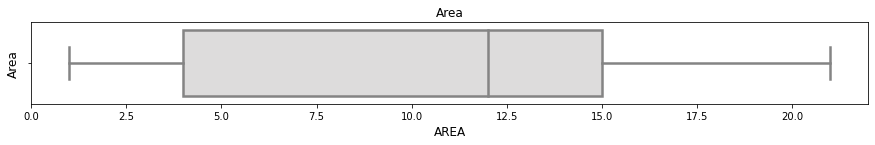

In [12]:
sns_boxplot(df, 'Victim Age', 'Victim Age', 'Victims', 'Vict_Age')
plt.savefig(eda_image_path + '/boxplot1.png', bbox_inches = 'tight')

sns_boxplot(df, 'Weapons', 'Weapons', 'Weapon Use', 'Weapon_Used_Cd')
plt.savefig(eda_image_path + '/boxplot2.png', bbox_inches = 'tight')

sns_boxplot(df, 'Area', 'Area', 'Area', 'AREA')
plt.savefig(eda_image_path + '/boxplot3.png', bbox_inches = 'tight')

### Bar Graphs <a class="anchor" id="bar-graphs"></a>

Generating bar graphs for columns of interest provides a visual context to numbers of occurrences for each respective scenario. A pre-defined plotting  function is called from the `functions.py` library to carry this out.

In [13]:
from functions import bar_plot

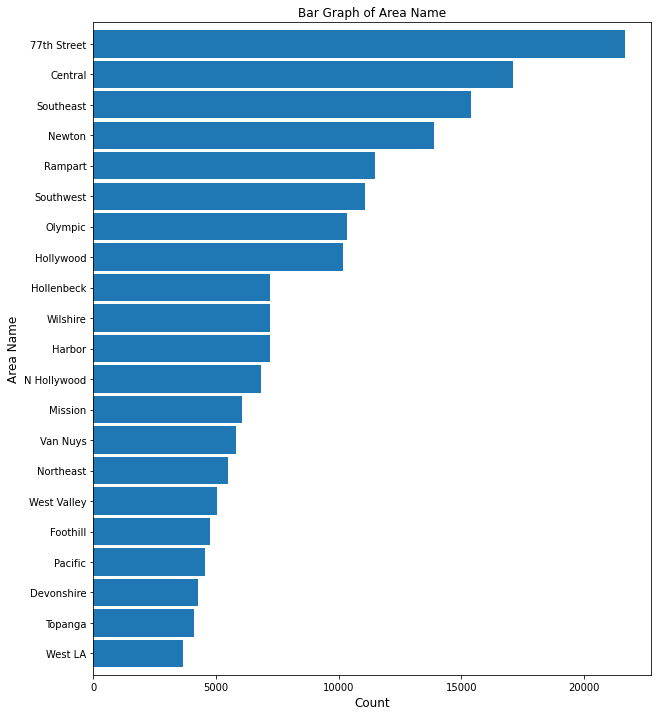

In [14]:
# plotting bar graph of area name
bar_plot(10, 12, df, True, 'barh', 'Bar Graph of Area Name', 0, 'Count', 
         'Area Name', 'AREA_NAME', 100)
plt.savefig(eda_image_path + '/area_name_bargraph.png', bbox_inches = 'tight')

This bar graph shows a steady drop off in crime for the top 100 area neighborhoods in Los Angeles. West LA boasts the lowest crime rate, whereas 77th Street shows the highest.

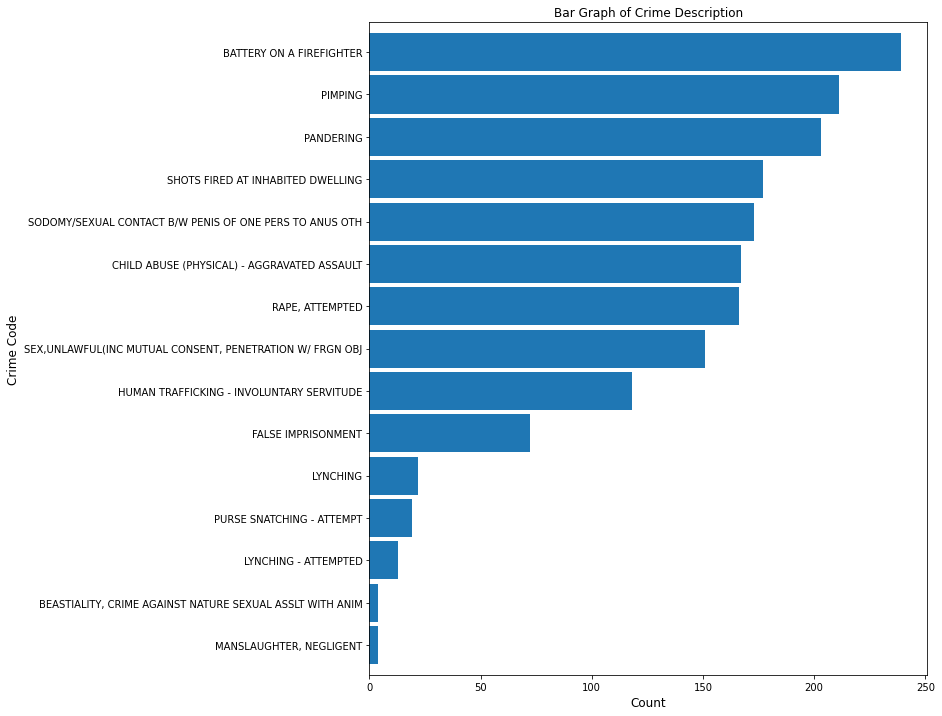

In [15]:
# plotting bar graph of crime description
bar_plot(10, 12, df, True, 'barh', 'Bar Graph of Crime Description', 0, 'Count', 
         'Crime Code', 'Crm_Cd_Desc', 15)
plt.savefig(eda_image_path + '/crime_desc_bargraph.png', bbox_inches = 'tight')

Among the top 15 crimes are battery on a firefighter (over 200), and negligent manslaughter (less than 50).

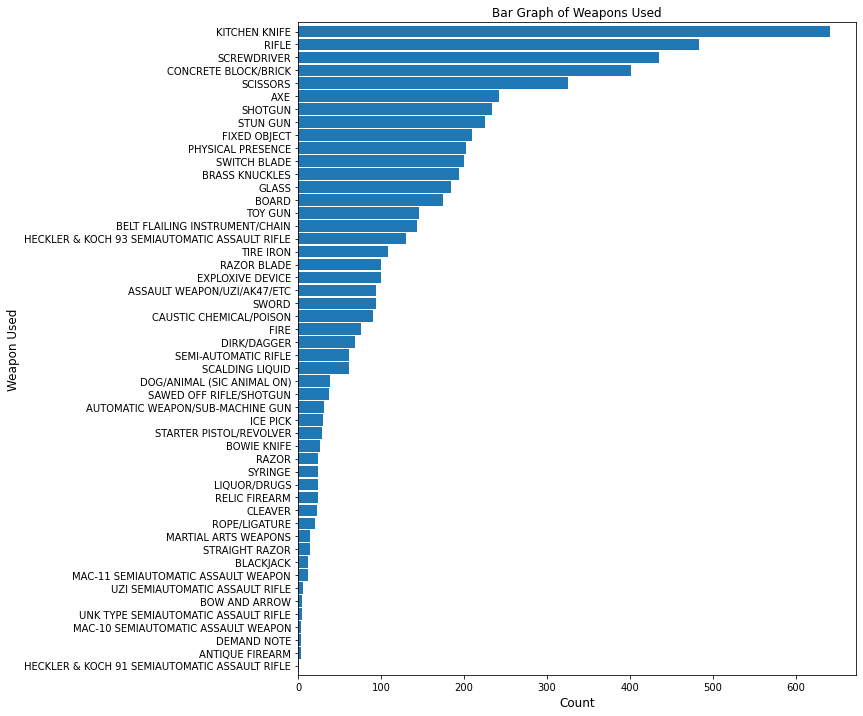

In [16]:
# plotting bar graph of weapons used
bar_plot(10, 12, df, True, 'barh', 'Bar Graph of Weapons Used', 0, 'Count', 
         'Weapon Used', 'Weapon_Desc', 50)
plt.savefig(eda_image_path + '/weapon_used_bargraph.png', bbox_inches = 'tight')

Among weapons used, the kitchen knife is presented over 600 times, whereas demand notes are among the rarest weapons in this dataset.

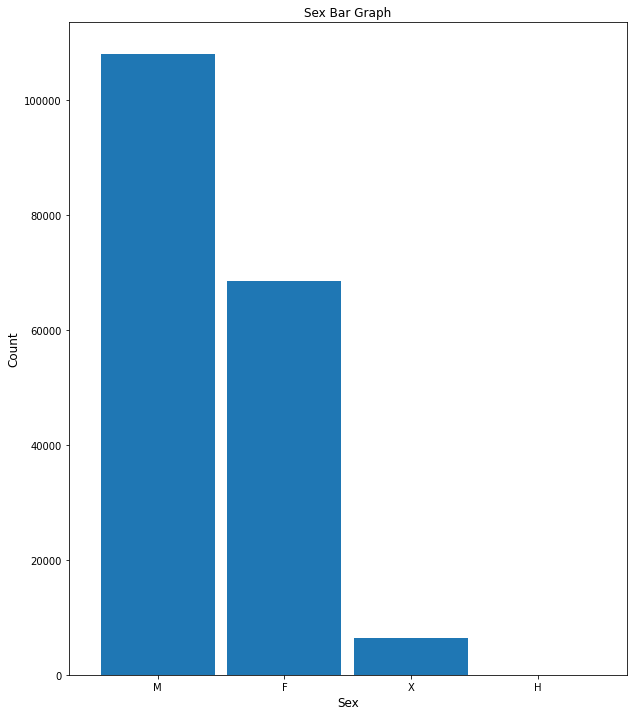

In [17]:
# plotting sex bar graph
bar_plot(10, 12, df, False, 'bar', 'Sex Bar Graph', 0, 'Sex', 'Count', 
         'Vict_Sex', 100)
plt.savefig(eda_image_path + '/sex_bargraph.png', bbox_inches = 'tight')

There are more males (over 100,000) than females (~70,000) in this dataset. There are less than 10,000 unknown sexes.

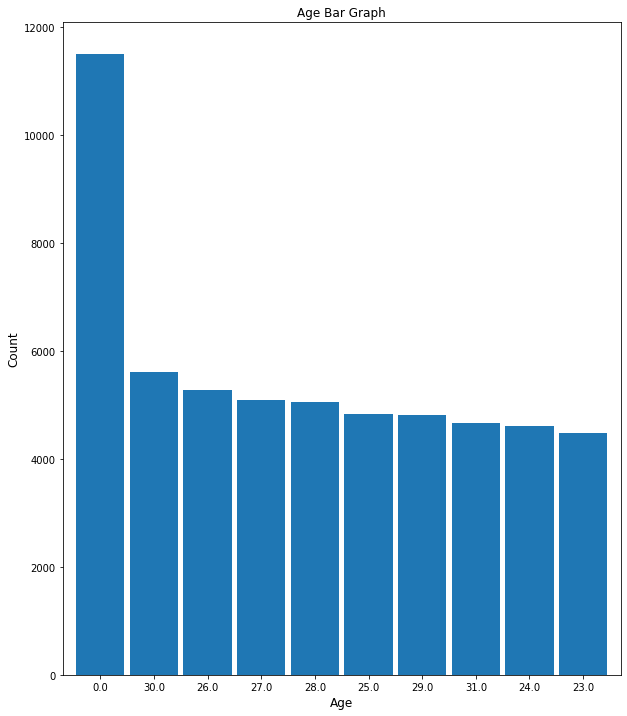

In [18]:
# plotting top ten victim ages
bar_plot(10, 12, df, False, 'bar', 'Age Bar Graph', 0, 'Age', 'Count', 
         'Vict_Age', 10)
plt.savefig(eda_image_path + '/age_bargraph.png', bbox_inches = 'tight')

Top 10 ages in this dataset range beween 0-30 years old.

# Data Preparation

In [19]:
# read in the csv file to a dataframe using pandas
df = pd.read_csv(data_file, low_memory=False).set_index('OBJECTID')
df.head()

,Shape,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,JOIN_FID,FullName,Type,Elevation,Surface,...,LAT,LON,OBJECTID_1,APREC,PREC,AREA_1,PERIMETER,SHAPE_Leng,Shape_Length_1,Shape_Length
OBJECTID,,,,,,,,,,,,,,,,,,,,,
18,"(-13168057.17375, 3992141.1804500036)",1,18,1,18,-1,NaN,Alley,Unknown,Unknown,...,33.7261,-118.2907,20.0,HARBOR,5.0,8.928780e+08,272451.139908,0.807721,0.807721,120.220887
36,"(-13180677.51995, 4031566.0669)",1,36,1,36,-1,NaN,Secondary,Surface,Paved,...,34.0205,-118.4040,17.0,PACIFIC,14.0,7.176129e+08,246934.321606,0.757182,0.757182,15.473452
37,"(-13180677.51995, 4031566.0669)",1,36,1,37,-1,NaN,Secondary,Surface,Paved,...,34.0205,-118.4040,17.0,PACIFIC,14.0,7.176129e+08,246934.321606,0.757182,0.757182,15.473452
44,"(-13160890.369035002, 4035687.0216437643)",1,43,1,44,-1,NaN,Minor,Surface,Paved,...,34.0509,-118.2265,11.0,HOLLENBECK,4.0,4.330323e+08,111317.952873,0.329096,0.329096,118.766240
56,"(-13165346.8195, 4030644.1469999994)",1,55,1,56,-1,NaN,Secondary,Surface,Paved,...,34.0138,-118.2663,16.0,NEWTON,13.0,2.723760e+08,81476.922847,0.241128,0.241128,9.731604


In [20]:
# show the columns of the dataframe for inspection
df.columns

Index(['Shape', 'Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'JOIN_FID', 'FullName', 'Type', 'Elevation', 'Surface', 'Status',
       'DrivingDir', 'From_L', 'From_R', 'To_L', 'To_R', 'Parity_L',
       'Parity_R', 'StPreDir', 'StPreMod', 'StPreType', 'StArticle', 'StName',
       'StPostType', 'StPostDir', 'StPostMod', 'Zip_L', 'Zip_R', 'LCity_L',
       'LCity_R', 'NameCat_L', 'NameCat_R', 'Accuracy', 'Jurisdiction',
       'Source', 'SourceID', 'UpdateDate', 'MSAG_LCity', 'MSAG_RCity',
       'MSAG_LESN', 'MSAG_RESN', 'Crime_Cost', 'StreetOID', 'Field1', 'DR_NO',
       'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1_2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes', 'Vict_Age', 'Vict_Sex',
       'Vict_Descent', 'Premis_Cd', 'Premis_Desc', 'Weapon_Used_Cd',
       'Weapon_Desc', 'Status_1', 'Status_Desc', 'Crm_Cd_1', 'Crm_Cd_2',
       'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT', 'LON',
       'OBJECTID_1', 'APREC', '

In [21]:
# re-inspect the shape of the dataframe. This is also done on EDA file.
print(' There are', df.shape[0], 'and', df.shape[1], 'columns in the dataframe.')

 There are 183362 and 80 columns in the dataframe.


## Introduction

The data is ingested from a shared google drive path and in its raw form, contains 183,362 rows and 80 columns. The preprocessing stage begins by inspecting each column's data types along with its respective null values.

In [22]:
# run the python file created for showing columns, data types, and their
# respective null counts (this was imported as a library at the top of this nb)
# import data_types.py file created for inspecting data types
from functions import data_types
dtypes = data_types(df)
pd.set_option('display.max_rows', None)
dtypes = dtypes.sort_values(by='# of Nulls', ascending=False)

In [23]:
# here only the top null columns are subset
# a good amount of these columns are to be subsequently removed
dat_typ = dtypes[(dtypes['Percent Null']<84) & (dtypes['# of Nulls']>0)]

# any column with '_L' and '_R' is of no interest and will be dropped
dat_typ = dat_typ[dat_typ['Column/Variable'].str.contains('_L')==False]
dat_typ = dat_typ[dat_typ['Column/Variable'].str.contains('_R')==False]
dat_typ

# object types are typically removed for ML processing, but some imputation
# may be necessary, which is why they are examined prior

,Column/Variable,Data Type,# of Nulls,Percent Null
18,StPreDir,object,83241,45.0
69,Cross_Street,object,74575,41.0
23,StPostType,object,6189,3.0
61,Weapon_Desc,object,3274,2.0
60,Weapon_Used_Cd,float64,3274,2.0
6,FullName,object,1357,1.0
22,StName,object,1357,1.0
75,AREA_1,float64,686,0.0
76,PERIMETER,float64,686,0.0
74,PREC,float64,686,0.0


For example, there are 3,274 missing values for weapon description. Imputation is necessary to properly assign the corresponding numerical value to the corresponding weapons used code, which is also missing 3,274 observations.

The victim descent column only has 171 missing values, the rows corresponding to these values can be dropped, but they are instead imputed with 'Unknown' since the ethnicities here remain unknown.

The same holds true for victim's sex, where there exist 167 missing values.

Ethnicity and age are important features which will be numericized and adapted for use with machine learning. Jurisdiction and other string columns presented herein will be subsequently omitted from the development (modeling) set.

## Imputation Strategies

Weapons used in crimes contain useful information, and the rows of missing data presented therein are imputed by a value of 500, corresponding to 'unknown' in the data dictionary. Similarly, the missing values in victim's sex and ethnicity, respectively, are imputed by a categorical value of "X," for "unknown." The 211 missing values contained in the zip code column are dropped since they cannot be logically imputed.

In [24]:
# Since the code for unknown weapons is 500, missing values for 'Weapon_Used_Cd' 
# where 'Weapon_Desc' is 'UNKNOWN WEAPON/OTHER WEAPON' will be 500.
# However, since missing values in one column correspond to the other, 
# missing values in 'Weapon_Desc' will need to be imputed first with
# 'UNKNOWN WEAPON/OTHER WEAPON'

# impute missing weapon descriptions
df['Weapon_Desc'] = df['Weapon_Desc'].fillna('UNKNOWN WEAPON/OTHER WEAPON')

# impute missing 'Weapon_Used_Cd' with 500 for reasons discussed above.
df['Weapon_Used_Cd'] = df['Weapon_Used_Cd'].fillna(500)

# impute missing values for victim's gender with 'X,' since this corresponds to
# 'Unknown' in the data dictionary
df['Vict_Sex'] = df['Vict_Sex'].fillna('X')

# impute missing values for victim's race with 'X,' since this corresponds to
# 'Unknown' in the data dictionary
df['Vict_Descent'] = df['Vict_Descent'].fillna('X')

# Since there are only 211 rows with missing zip codes, those rows are dropped
df.dropna(subset=['Zip_R'], inplace=True)

## Feature Engineering

There exist two date columns, date reported and date occurred, of which only the latter is used for extracting the year and month into two new columns, respectively, since a date object by itself cannot be used in a machine learning algorithm. In addition, descriptions of street premises are first converted into lower case strings within the column and subsequently encoded into separate binarized columns. Similarly, new columns for time (derived from military time) and city neighborhoods (derived from area) are encoded into binarized columns, respectively.

More importantly, the target column (Crime_Code) is defined by the values in the 'Crm_Cd' column where 0 is for any crime that ranges from 1-499 (most severe) and 1 is for any crime above 500 (less severe).

In [25]:
# create new column only for year of 'Date_Occurred'
df['Year'] = pd.DatetimeIndex(df['DATE_OCC']).year

# create new numeric column for month of year
df['Month_No'] = pd.DatetimeIndex(df['DATE_OCC']).month
# create new string column for month of year
df['Month'] = df['Month_No'].map({1: 'January', 2: 'February', 3: 'March',
                                  4: 'April', 5: 'May', 6: 'June', 7: 'July',
                                  8: 'August', 9: 'September', 10: 'October',
                                  11: 'November', 12: 'December'})

# bin the ages using pd.cut() function
# 
df['age_bin'] = pd.cut(df['Vict_Age'],
                       bins=[-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 
                             60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 
                             115, 120],
                       labels=[' 0-5', ' 5-10', '10-15', '15-20', '20-25',
                               '25-30', '30-35', '35-40', '40-45', '45-50',
                               '50-55', '55-60', '60-65', '65-70', '70-75',
                               '75-80', '80-85', '85-90', '90-95', '95-100', 
                               '100-105', '105-110', '110-115', '115-120'])

# binarize the 'Crm_Cd' column; this is the target column
# 0 is for any crime that ranges 1-499 (most severe)
# anything above 500 is less severe
df['Crime_Code'] = df['Crm_Cd'].apply(lambda value: 1 if value <= 499 else \
                                     (0 if value >= 500 else 2))

# re-categorize ground truth as serious vs. not serious crimes where serious 
# crimes are '1' and less serious crimes are '0'
df['crime_severity'] = df['Crime_Code'].map({0:'Less Serious', 1:'More Serious'})

# creating a new column of premises types by renaming the premises types to lower
# case characters and eliminating spaces between words
df['Premises'] = df['Premis_Desc'].replace({'STREET': 'Street',
                                            'SIDEWALK': 'Sidewalk',
                                            'PARKING LOT': 'Parking_Lot',
                                            'ALLEY': 'Alley',
                                            'DRIVEWAY': 'Driveway',
                                            'PARK/PLAYGROUND': 'Park_Playground',
                                            'VACANT LOT': 'Vacant_Lot',
                                            'TUNNEL': 'Tunnel',
                                            'PEDESTRIAN OVERCROSSING': \
                                            'Pedestrian_Overcrossing'})

# replace strings with spaces of neighborhoods within 'AREA_NAME' to 
# strings without spaces by replacing the space with an underscore since 
# this is a more acceptable format for a final dataframe
df['AREA_NAME'] = df['AREA_NAME'].replace({'77th Street': '77th_Street',
                                           'N Hollywood': 'N_Hollywood',
                                           'Van Nuys': 'Van_Nuys',
                                           'West Valley': 'West_Valley',
                                           'West LA': 'West_LA'})

# creating instance of one-hot-encoder using pd.get_dummies
# perform one-hot encoding on 'Vict_Descent' column 
premise_encode = pd.get_dummies(df['Premises'])
# join these new columns back to the original dataframe
df = premise_encode.join(df)

def applyFunc(s):
    if s==0:
        return 'Midnight'
    elif s<=1159:
        return 'Morning'
    elif s>=1200 and s<=1800:
        return 'Afternoon'
    elif s>=1800 and s<=2200:
        return 'Evening'
    elif s>2200:
        return 'Night'

df['Time_of_Day'] = df['TIME_OCC'].apply(applyFunc)

# dummy encode military time into 'Morning', 'Afternoon', 'Evening', 'Night',
# and 'Midnight' time of day strings, respectively, making them their own
# separate and distinct columns
military_encode = pd.get_dummies(df['Time_of_Day'])
df = military_encode.join(df)

# dummy encode area names into their own separate and distinct columns
area_encode = pd.get_dummies(df['AREA_NAME'])
df = area_encode.join(df)

## Reclassifying Useful Categorical Features

Gender and ethnicity are critical factors in making informed decisions about crime. New columns are created for both variables to better represent their characteristics. For example, unidentified genders are replaced with unknowns, and one-letter abbreviations for victim descent are re-categorized into full-text ethnicity descriptions from the city of Los Angeles' data dictionary.

In [26]:
# narrow down victim sex column to three categories (M, F, X=Unknown). Currently,
# there are four, with "H" presented. "H" is re-categorized to "X" since it is not
# in the data dictionary, and thus, remains unknown.
df['Victim_Sex'] = df['Vict_Sex'].map({'F':'F', 'H':'X', 'M':'M', 'X':'X'})
df['Gender'] = df['Victim_Sex'].map({'F':1, 'M':2, 'X':3})

# reclassify letters in victim description back to full race description from
# data dictionary nomenclature and add as new column; this will be helpful for 
# additional EDA post pre-processing.
df['Victim_Desc'] = df['Vict_Descent'].map({'A':'Other Asian', 'B':'Black', 'C':
                                         'Chinese', 'D': 'Cambodian', 'F':
                                         'Filipino', 'G': 'Guamanian', 'H':
                                         'Hispanic/Latin/Mexican', 'I':
                                         'American Indian/Alaskan Native', 'J':
                                         'Japanese', 'K': 'Korean', 'L': 'Laotian',
                                         'O': 'Other', 'P': 'Pacific Islander',
                                         'S': 'Samoan', 'U': 'Hawaiian', 'V':
                                         'Vietnamese', 'W': 'White', 'X': 'Unknown',
                                         'Z': 'Asian Indian'})

# write out the preliminarily preprocessed df to new .csv file
df.to_csv('/content/drive/Shareddrives/Capstone - Best Group/Final_Data_20220719'
         +'/df.csv')

## Remove Columns Not Used for Model Development (Exclusion Criteria)

Any columns with all null rows and object data types are immediately dropped from the dataset, but cast into a new dataframe for posterity. Furthermore, only data from the year 2022 is included, since older retrospective data does not represent an accurate enough depiction of crime in the city of Los Angeles. Longitude and latitude columns are dropped since city neighborhood columns take their place for geographic information. Moreover, columns like retained joins, identifications, report numbers, and categorical information encoded to the original dataframe are omitted from this dataframe. Columns that only present one unique value (Pedestrian Overcrossing and Tunnel) are removed. Lastly, any column (military time) that presents over and above the Pearson correlation threshold of r = 0.75 is dropped to avoid between-predictor collinearity; all numeric values in the dataframe are cast to integer type formatting.

In [27]:
# make a unique list of cols to remove that are completely missing
cols_remove_null = data_types(df)[(data_types(df)["Percent Null"]==100)] \
                            ['Column/Variable'].unique()
                            
# make a unique list of cols to remove that are non-numeric
cols_remove_string = data_types(df)[(data_types(df)["Data Type"]=='object')] \
                              ['Column/Variable'].unique()

intersect = np.intersect1d(cols_remove_null, cols_remove_string)
print('The following columns intersect as being objects and being null:',
      intersect, '\n')

# Since these columns exist as objects too, they can be removed from the
# list of nulls such that they are not doubled up between the two.'
refined_null = [x for x in cols_remove_null if x not in cols_remove_string]

# set-up new df without dropped columns (dataframe used later for modeling)
df_prep = df.drop(columns=refined_null) 

# Subset dataframe for observations only taking place in year 2022
df_prep = df_prep[df_prep['Year']==2022]

print('Removed Fully Null columns:')
for c in cols_remove_null:
    print(f'\t{c}')
print()

# these columns are to be removed b/c they are object datatypes 
# (i.e., free text, strings)
df_prep = df_prep.drop(columns=cols_remove_string)

print('Removed string and object columns:')
for c in cols_remove_string:
    print(f'\t{c}')

# drop latitude & longitude columns; they will not be used to inform ML model(s)
print()
print('Removed Latitude and Longtitude Columns')
for col in df_prep.columns:
    if 'LAT' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')
    elif 'LON' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')

# drop any additional crime code columns, since only Crm_Cd without number
# following it will be used as target
print()
print('Removed Extraneous Crm_Cd Columns:')
for col in df_prep.columns:
    if 'Crm_Cd' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')
print()

# drop any columns that persisted after join or feature engineering
print()
print('Removed Columns Persisting After JOIN:')

for col in df_prep.columns:
    if 'JOIN_' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')
    elif 'Join_' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')
    elif 'OBJECTID' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')
    elif 'Premis' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')
    elif 'Time' in col:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')   

# removed 'Victim_Sex' column because numericized as new 'Gender' column
# removed 'Victim_Desc' (ethnicity) since these cannot be numerically 
# classified without introducing bias

# drop any columns with '_L' or '_R' nomenclature since these are positional
# street indexes which are used to compile other location-based information

# drop the 'DR_NO' column since these are associated with records
df_prep = df_prep.drop(columns=['From_L', 'From_R', 'To_L', 'To_R', 'Zip_L', 
                                'Zip_R', 'SHAPE_Leng', 'Shape_Length_1',
                                'Shape_Length', 'DR_NO', 'TARGET_FID', 'age_bin',
                                'TARGET_FID_1', 'Accuracy', 'Crime_Cost',
                                'StreetOID', 'Field1', 'AREA', 'AREA_1', 
                                'Part_1_2', 'Weapon_Used_Cd', 'PREC', 'Year',
                                'PERIMETER', 'Rpt_Dist_No'])

print()
print('Removed columns with only one unique value:')
for col in df_prep:
    # remove any columns that have only one unique value in the data
    if df_prep[col].nunique() == 1:
        df_prep = df_prep.drop(columns=col)
        print(f'\t{col}')

# identify and drop any columns exceeding a correlation threshold of 0.75
corr_df = df_prep.reset_index(drop=True) # omit index by subsetting in new df
corr_matrix = corr_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater >= 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
# Drop features exceeding a correlation threshold of 0.75
df_prep = df_prep.drop(corr_df[to_drop], axis=1)
print()
print('These are the columns we should drop: %s'%to_drop)

# cast all numeric variables in preprocessed dataset to integers
df_prep = df_prep.astype(int)

The following columns intersect as being objects and being null: ['MSAG_LCity' 'MSAG_RCity' 'StPostDir' 'StPreMod'] 

Removed Fully Null columns:
	StPreMod
	StPostDir
	StPostMod
	MSAG_LCity
	MSAG_RCity
	MSAG_LESN
	MSAG_RESN
	Crm_Cd_4

Removed string and object columns:
	Shape
	FullName
	Type
	Elevation
	Surface
	Status
	DrivingDir
	Parity_L
	Parity_R
	StPreDir
	StPreMod
	StPreType
	StArticle
	StName
	StPostType
	StPostDir
	LCity_L
	LCity_R
	NameCat_L
	NameCat_R
	Jurisdiction
	Source
	SourceID
	UpdateDate
	MSAG_LCity
	MSAG_RCity
	Date_Rptd
	DATE_OCC
	AREA_NAME
	Crm_Cd_Desc
	Mocodes
	Vict_Sex
	Vict_Descent
	Premis_Desc
	Weapon_Desc
	Status_1
	Status_Desc
	LOCATION
	Cross_Street
	APREC
	Month
	crime_severity
	Premises
	Time_of_Day
	Victim_Sex
	Victim_Desc

Removed Latitude and Longtitude Columns
	LAT
	LON

Removed Extraneous Crm_Cd Columns:
	Crm_Cd
	Crm_Cd_1
	Crm_Cd_2
	Crm_Cd_3


Removed Columns Persisting After JOIN:
	Join_Count
	Join_Count_1
	JOIN_FID
	Premis_Cd
	OBJECTID_1

Removed col

In [28]:
# describe the new preprocessed dataset as the development set and list its cols
development_cols = df_prep.columns.to_list()
print('Development Data Column List:', '\n')
for x in development_cols:
    print(x)
print()
print('There are', df_prep.shape[0], 'rows and', df_prep.shape[1], 
      'columns in the development set.')

Development Data Column List: 

77th_Street
Central
Devonshire
Foothill
Harbor
Hollenbeck
Hollywood
Mission
N_Hollywood
Newton
Northeast
Olympic
Pacific
Rampart
Southeast
Southwest
Topanga
Van_Nuys
West_LA
West_Valley
Wilshire
Afternoon
Evening
Morning
Night
Alley
Driveway
Park_Playground
Parking_Lot
Sidewalk
Street
Vacant_Lot
Vict_Age
Month_No
Crime_Code
Gender

There are 42072 rows and 36 columns in the development set.


Data types are examined once more on this preprocessed dataset to ensure that all data types are integers and no columns remain null. At this stage, there are 42,072 rows and 38 columns.

In [29]:
# run the python file for checking data types again 
# this time, for the development set
data_types(df_prep)

,Column/Variable,Data Type,# of Nulls,Percent Null
0,77th_Street,int64,0,0.0
1,Central,int64,0,0.0
2,Devonshire,int64,0,0.0
3,Foothill,int64,0,0.0
4,Harbor,int64,0,0.0
5,Hollenbeck,int64,0,0.0
6,Hollywood,int64,0,0.0
7,Mission,int64,0,0.0
8,N_Hollywood,int64,0,0.0
9,Newton,int64,0,0.0


In [30]:
df_prep = df_prep.copy()
df_prep.shape

(42072, 36)

## Train-Test-Validation Split

The data is split into a fifty percent development (training and validation) and fifty percent holdout (testing) sets, respectively, saving 3 separate files to the data folder path.

In [31]:
# set random state for reproducibility
rstate = 222

In [32]:
# Divide train set by 50%, valid set by 25%, and test set by 25%
train_prop = 0.50
valid_prop = 0.25
test_prop = 0.25
size_train = np.int64(round(train_prop*len(df_prep),2))
size_valid = np.int64(round(valid_prop*len(df_prep),2))
size_test = np.int64(round(test_prop*len(df_prep),2))
size_total = size_test + size_valid + size_train

# split the data into the development (train and validation)
# and test set, respectively
train, test = train_test_split(df_prep, train_size=size_train,\
                              random_state=rstate)
valid, test = train_test_split(test, train_size=size_valid,\
                              random_state=rstate)

print('Training size:', size_train)
print('Validation size:', size_valid)
print('Test size:', size_test)
print('Total size:', size_train + size_valid + size_test, '\n')
print('Training percentage:', round(size_train/(size_total),2))
print('Validation percentage:', round(size_valid/(size_total),2))
print('Test percentage:', round(size_test/(size_total),2))
print('Total percentage:', (size_train/size_total + size_valid/size_total \
                          + size_test/size_total)*100)

Training size: 21036
Validation size: 10518
Test size: 10518
Total size: 42072 

Training percentage: 0.5
Validation percentage: 0.25
Test percentage: 0.25
Total percentage: 100.0


In [33]:
# subset the development and test sets into their own respective dataframes
train_set = train
valid_set = valid
test_set = test

### Save Train, Validation, and Test Sets as Separate .CSV Files

In [34]:
# write out the train, validation, and test sets to .csv files to the data folder
# such that they are contained in their own unique files
# the train and validation sets can be used without prejudice. However, the data
# can ONLY be run on the test set once
train_set.to_csv(data_folder + '/train_set.csv')
valid_set.to_csv(data_folder + '/valid_set.csv')
test_set.to_csv(data_folder + '/test_set.csv')

# Exploratory Data Analysis - Phase II

In [35]:
# bring in original dataframe as preprocessed in the 
# data_preparation.ipynb file
df = pd.read_csv(data_frame, low_memory=False).set_index('OBJECTID')

In [36]:
# re-inspect the shape of the dataframe. 
print('There are', df.shape[0], 'rows and', df.shape[1], 
      'columns in the dataframe.')

There are 183151 rows and 125 columns in the dataframe.


## Age Range Statistics <a class="anchor" id="age-range-statistics"></a>

The top three ages of crime victims are 25-30, 20-25, and 30-35, with ages 25-30 reporting 25,792 crimes, ages 20-25 reporting 22,235 crimes, and ages 30-35 reporting 21,801 crimes, respectively.

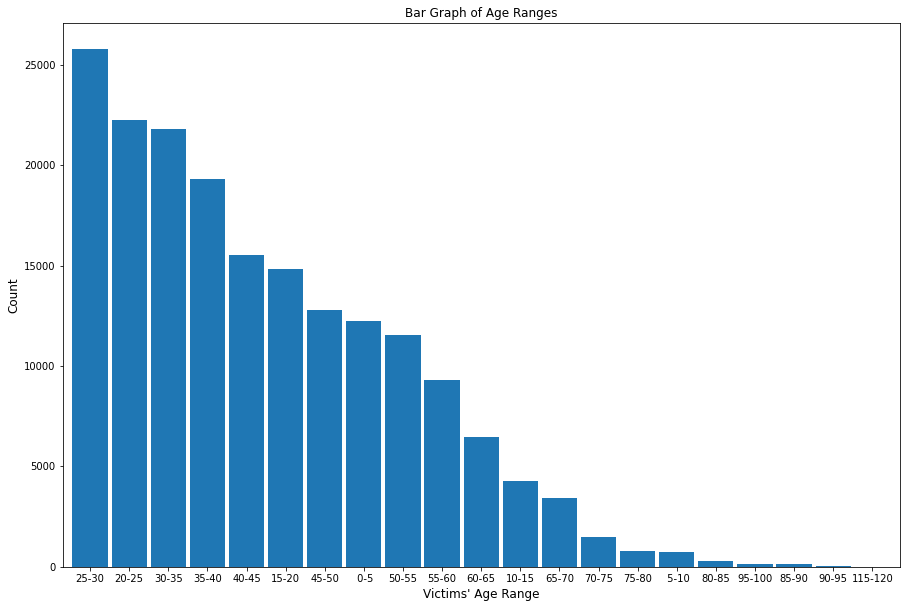

In [37]:
# this bar_plot library was created as a bar_plot.py file during the EDA Phase I
# stage; it can be acccessed in that respective notebook
from functions import bar_plot
bar_plot(15, 10, df, False, 'bar', 'Bar Graph of Age Ranges', 0, 
         "Victims' Age Range", 'Count', 'age_bin', 100)
plt.savefig(eda_image_path + '/age_range_bargraph.png', bbox_inches = 'tight')

## Contingency Table

Using a contingency table allows for the data in any column of interest to be summarized by the values in the target column (crime severity).

In [38]:
from functions import cont_table

## Summary Statistics

Calling this from the `functions.py` library will provide summary statistics for any column in the dataframe.

In [39]:
from functions import summ_stats

### Status Description by Age

In [40]:
summ_stats(df, 'Status_Desc', 'Vict_Age')

Summary Statistics by Age


,Mean,Median,Standard Deviation,Minimum,Maximum
Status_Desc,,,,,
Adult Arrest,33.00,32.00,17.85,0.00,99.00
Adult Other,35.69,34.00,15.24,0.00,99.00
Invest Cont,34.64,33.00,16.96,0.00,120.00
Juv Arrest,26.26,23.00,16.39,0.00,81.00
Juv Other,23.35,17.00,16.01,0.00,76.00


### Victim Sex by Age

The average age of male victims is approximately 36 years old, whereas the mean age of female victims is approximately 34 years old, with the means presenting greater age values than the medians (positively skewed distributions for both). Unknown genders show a mean age of approximately six years old and a median of 0 (newborns or infants).

In [41]:
summ_stats(df, 'Victim_Sex', 'Vict_Age')

Summary Statistics by Age


,Mean,Median,Standard Deviation,Minimum,Maximum
Victim_Sex,,,,,
F,34.44,32.00,15.19,0.00,99.00
M,36.32,35.00,16.46,0.00,99.00
X,5.69,0.00,12.95,0.00,120.00


## Stacked Bar Plots

  This function provides a stacked and normalized bar graph of any column of 
  interest, colored by ground truth column

In [42]:
from functions import stacked_plot

### Crime Severity by Age Group
Crime severity presents at an about even ratio per age group, with the exception being the highest age range of 115-120, where crime incidence is lower, but overall, more serious. Moreover, it is interesting to note that there are 19,073 more serious crimes than less serious ones, comprising an overwhelming majority (55.56%) of all cases.

In [43]:
age_table = cont_table(df, 'crime_severity', 'Less Serious', 'age_bin', 
                       'More Serious').data
age_table

,Less Serious,More Serious,Total,% More Serious
age_bin,,,,
0-5,"6,731.00","5,516.00","12,247.00",45.04
5-10,343.00,387.00,730.00,53.01
10-15,"2,329.00","1,932.00","4,261.00",45.34
15-20,"6,348.00","8,465.00","14,813.00",57.15
20-25,"9,697.00","12,538.00","22,235.00",56.39
25-30,"10,975.00","14,817.00","25,792.00",57.45
30-35,"9,708.00","12,093.00","21,801.00",55.47
35-40,"8,583.00","10,716.00","19,299.00",55.53
40-45,"6,744.00","8,802.00","15,546.00",56.62


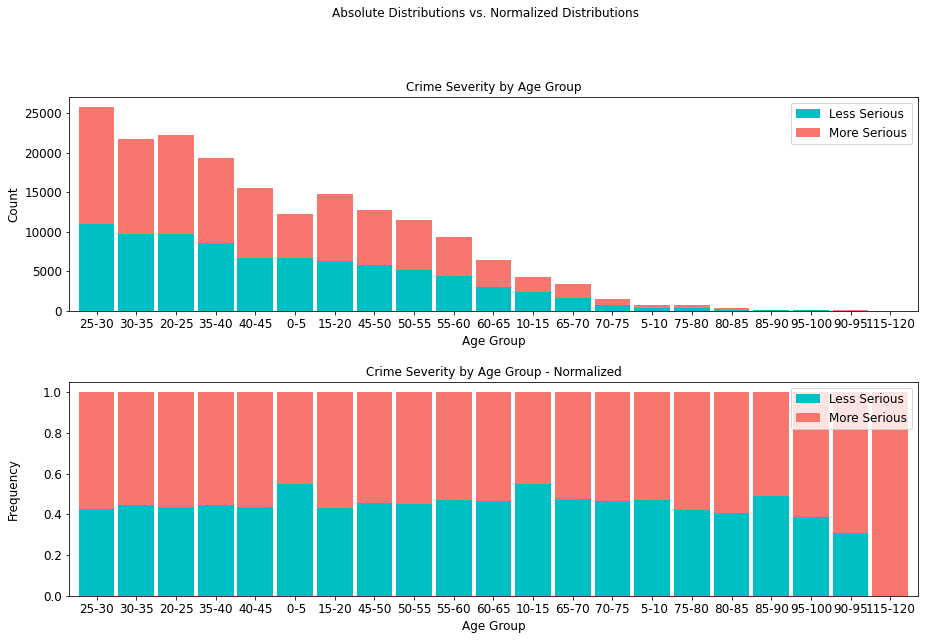

In [44]:
stacked_plot(15, 10, 10, df, 'age_bin', 'crime_severity', 'Less Serious', 'bar', 
             'Crime Severity by Age Group', 'Age Group', 'Count', 0.9, 0,
             'Crime Severity by Age Group - Normalized', 'Age Group', 
             'Frequency')
plt.savefig(eda_image_path + '/age_crime_bargraph.png', bbox_inches='tight')

### Crime Severity by Street Type
It is interesting to note that not only the least serious crimes occur in alleys, pedestrian walkways, private roads (paved or unpaved), and trails, but that where they do occur, they are less severe.

In [45]:
street_type_table = cont_table(df, 'crime_severity', 'Less Serious', 
                               'Type', 'More Serious').data
street_type_table

,Less Serious,More Serious,Total,% More Serious
Type,,,,
Alley,240.00,190.00,430.00,44.19
Minor,"41,420.00","49,066.00","90,486.00",54.22
Pedestrian Walkway,211.00,49.00,260.00,18.85
Primary,"29,291.00","35,953.00","65,244.00",55.11
Private Road,31.00,38.00,69.00,55.07
Secondary,"11,562.00","15,077.00","26,639.00",56.60
Trail,15.00,6.00,21.00,28.57
Unpaved Road,NaN,2.00,2.00,0.00
Total,"82,770.00","100,381.00","183,151.00",54.81


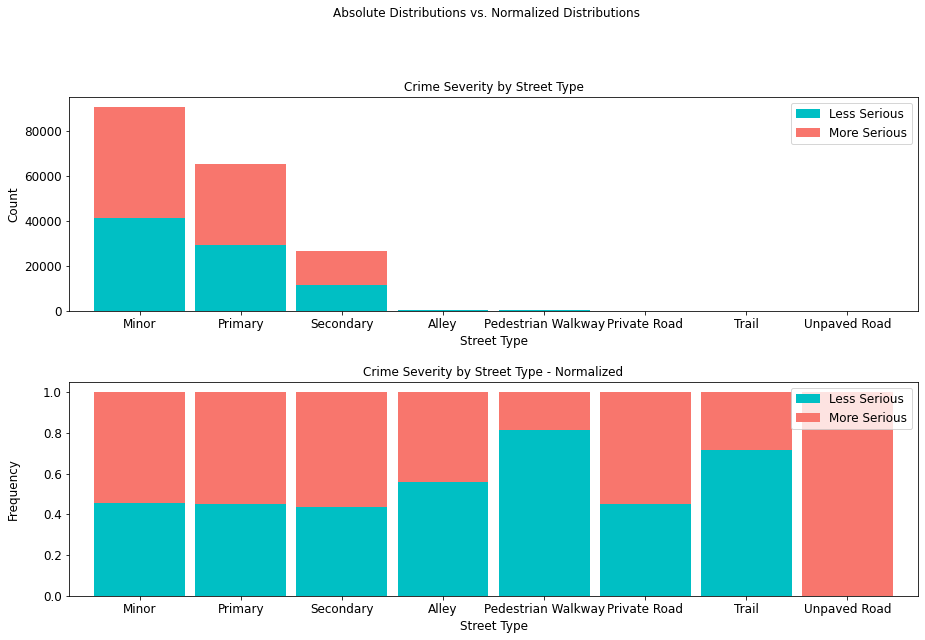

In [46]:
stacked_plot(15, 10, 10, df, 'Type', 'crime_severity', 'Less Serious', 'bar', 
             'Crime Severity by Street Type', 'Street Type', 'Count', 0.9, 0, 
             'Crime Severity by Street Type - Normalized', 'Street Type',
             'Frequency')
plt.savefig(eda_image_path + '/street_type_bargraph.png', bbox_inches='tight')

### Crime Severity by Sex
Whereas there are more males than females in this dataset, it can be seen from both the regular and normalized distributions, respectively, that more serious crimes occur with a higher prevalence (69,370 or 64.24%) for the former than the latter (28,565 or 41.70%). For sexes unknown, there is a 36.70% prevalence rate for more serious crimes.

In [47]:
sex_table = cont_table(df, 'crime_severity', 'Less Serious', 'Victim_Sex', 
                       'More Serious').data
sex_table

,Less Serious,More Serious,Total,% More Serious
Victim_Sex,,,,
F,39936,28565,68501,41.70
M,38615,69370,107985,64.24
X,4219,2446,6665,36.70
Total,82770,100381,183151,54.81


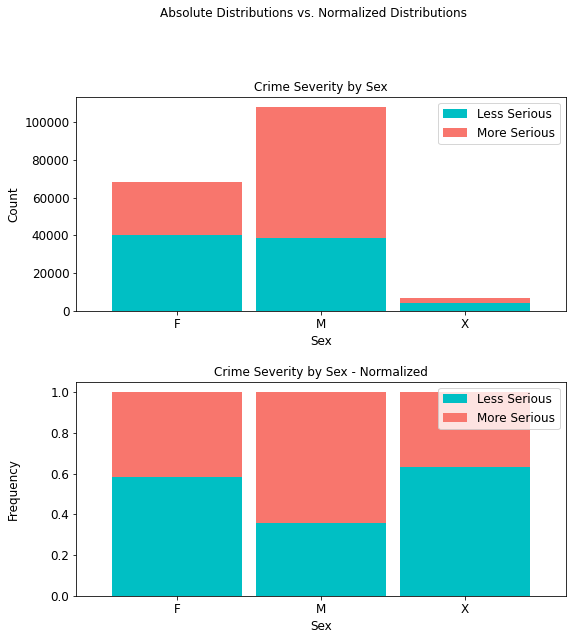

In [48]:
stacked_plot(10, 10, 10, df, 'Victim_Sex', 'crime_severity', 'Less Serious', 
             'bar', 'Crime Severity by Sex', 'Sex', 'Count', 
             0.9, 0, 'Crime Severity by Sex - Normalized', 'Sex', 'Frequency')
plt.savefig(eda_image_path + '/victim_sex_bargraph.png', bbox_inches='tight')

### Crime Severity by Time of Day
It is interesting to note that more serious crimes (35,396) occur in the morning than any other time of day, with more serious night crimes accounting for only 9,814 (approximately 10%) of all such crimes.

In [49]:
time_table = cont_table(df, 'crime_severity', 'Less Serious', 
                        'Time_of_Day', 'More Serious').data
time_table

,Less Serious,More Serious,Total,% More Serious
Time_of_Day,,,,
Afternoon,29609,31406,61015,51.47
Evening,18547,23765,42312,56.17
Morning,28105,35396,63501,55.74
Night,6509,9814,16323,60.12
Total,82770,100381,183151,54.81


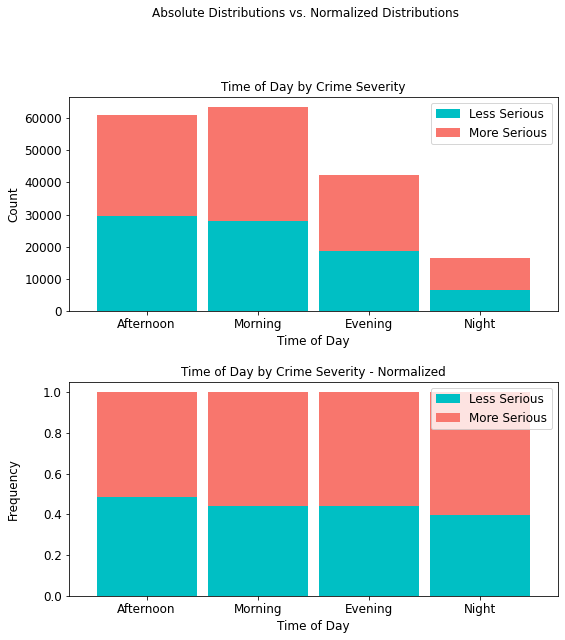

In [50]:
stacked_plot(10, 10, 10, df, 'Time_of_Day', 'crime_severity', 'Less Serious', 
             'bar', 'Time of Day by Crime Severity', 'Time of Day', 'Count', 
             0.9, 0, 'Time of Day by Crime Severity - Normalized', 
             'Time of Day', 'Frequency')
plt.savefig(eda_image_path + '/time_of_day_bargraph.png', bbox_inches='tight')

### Crime Severity by Month
The month of June presents a record of 10,852 more serious crimes than any other month, so there exists a higher prevalence of more serious crimes mid-year than any other time of year.

In [51]:
month_table = cont_table(df, 'crime_severity', 'Less Serious', 
                         'Month', 'More Serious').data
month_table

,Less Serious,More Serious,Total,% More Serious
Month,,,,
April,8165,9530,17695,53.86
August,6002,7468,13470,55.44
December,4241,5843,10084,57.94
February,7960,9114,17074,53.38
January,8376,9457,17833,53.03
July,6690,8404,15094,55.68
June,8756,10852,19608,55.34
March,8092,9216,17308,53.25
May,8841,10548,19389,54.40


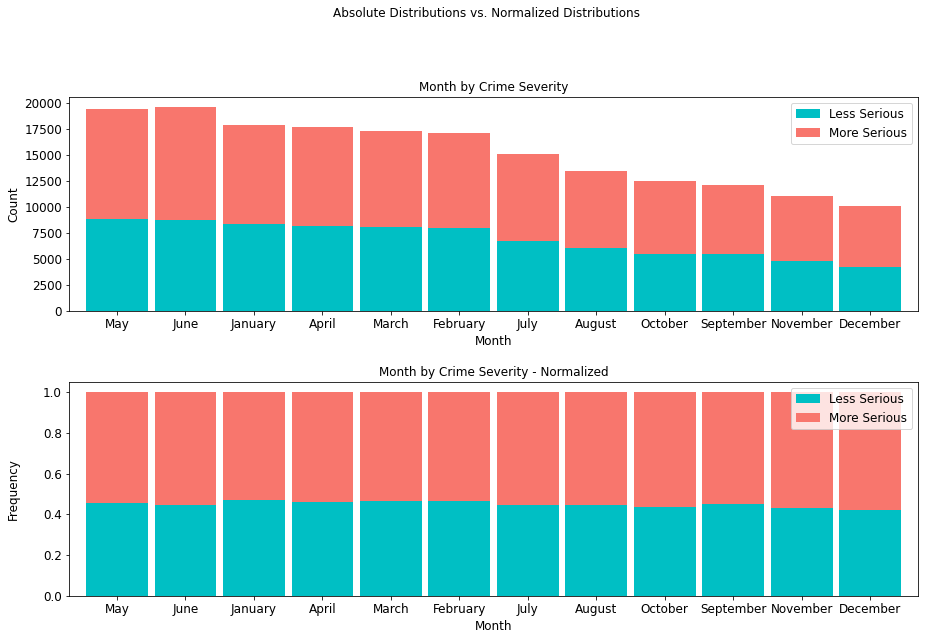

In [52]:
stacked_plot(15, 10, 10, df, 'Month', 'crime_severity', 'Less Serious', 
             'bar', 'Month by Crime Severity', 'Month', 'Count', 
             0.9, 0, 'Month by Crime Severity - Normalized', 
             'Month', 'Frequency')
plt.savefig(eda_image_path + '/month_bargraph.png', bbox_inches='tight')

### Crime Severity Victim Descent
In terms of ethnicity, members of the Hispanic/Latin/Mexican demographic account for 51,601 incidences of more serious crimes. More importantly, with an additional 40,226 less serious crimes, this demographic accounts for a total of 91,827 crimes, an overwhelming 50% of all crimes in the data.

In [53]:
descent_table = cont_table(df, 'crime_severity', 'Less Serious', 
                           'Victim_Desc', 'More Serious').data
descent_table

,Less Serious,More Serious,Total,% More Serious
Victim_Desc,,,,
American Indian/Alaskan Native,28.00,16.00,44.00,36.36
Black,"16,598.00","26,092.00","42,690.00",61.12
Filipino,23.00,33.00,56.00,58.93
Guamanian,16.00,4.00,20.00,20.00
Hispanic/Latin/Mexican,"40,226.00","51,601.00","91,827.00",56.19
Japanese,5.00,9.00,14.00,64.29
Korean,129.00,162.00,291.00,55.67
Other,"5,043.00","4,877.00","9,920.00",49.16
Other Asian,"1,485.00","1,541.00","3,026.00",50.93


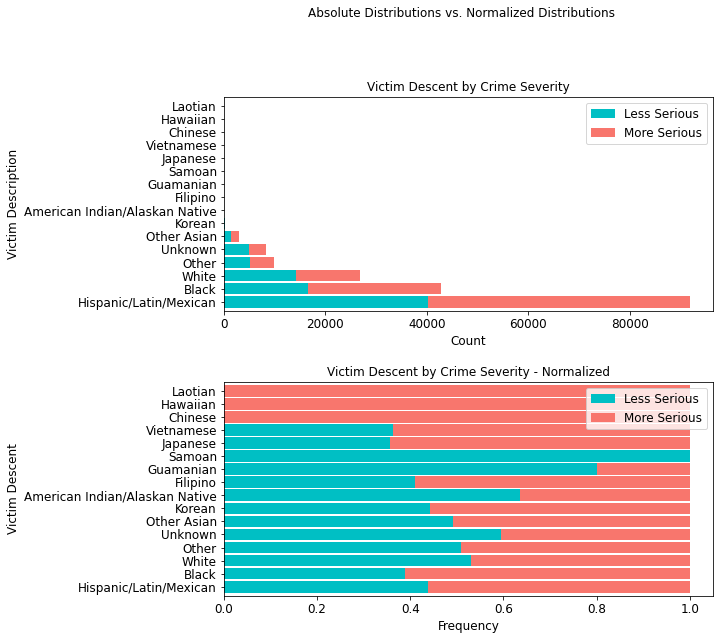

In [54]:
stacked_plot(10,10, 10, df, 'Victim_Desc', 'crime_severity', 'Less Serious', 
             'barh', 'Victim Descent by Crime Severity', 'Count', 
             'Victim Description', 0.9, 0, 
             'Victim Descent by Crime Severity - Normalized', 
             'Frequency', 'Victim Descent')
plt.savefig(eda_image_path + '/victim_desc_bargraph.png', bbox_inches='tight')

### Crime Severity by Neighborhood
In terms of neighborhoods based on police districts, the 77th Street region shows the highest amount of more serious crimes (14,350) than any other district; second is the Southeast area (10,142).

In [55]:
area_table = cont_table(df, 'crime_severity', 'Less Serious', 
                        'AREA_NAME', 'More Serious').data
area_table

,Less Serious,More Serious,Total,% More Serious
AREA_NAME,,,,
77th_Street,7330,14350,21680,66.19
Central,7733,9395,17128,54.85
Devonshire,2398,1846,4244,43.50
Foothill,2347,2421,4768,50.78
Harbor,3459,3735,7194,51.92
Hollenbeck,3102,4113,7215,57.01
Hollywood,5058,5129,10187,50.35
Mission,2716,3278,5994,54.69
N_Hollywood,3789,3039,6828,44.51


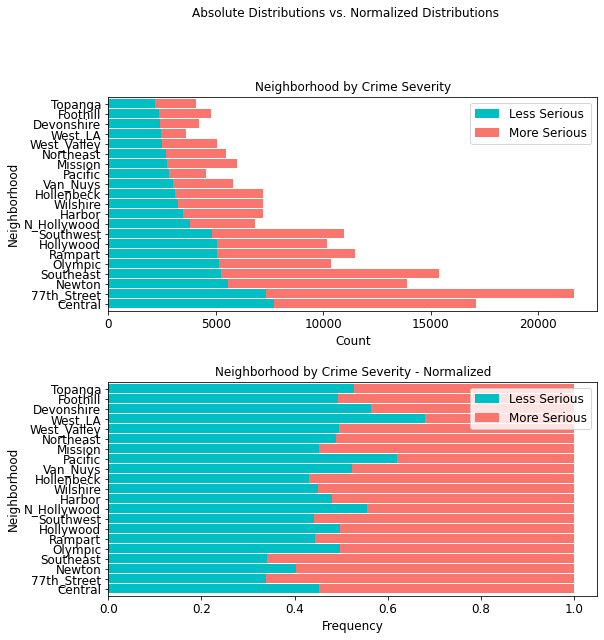

In [56]:
stacked_plot(10, 10, 10, df, 'AREA_NAME', 'crime_severity', 'Less Serious', 
             'barh', 'Neighborhood by Crime Severity', 'Count', 'Neighborhood', 
             0.9, 0, 'Neighborhood by Crime Severity - Normalized', 'Frequency', 
             'Neighborhood')
plt.savefig(eda_image_path + '/neighborhood_bargraph.png', bbox_inches='tight')

### Crime Severity by Premises
It is equally important to note that most crimes (100,487 or ~55%) occur on the street, with 57.51% being attributed to more serious crimes.

In [57]:
premis_table = cont_table(df, 'crime_severity', 'Less Serious', 
                          'Premises', 'More Serious').data
premis_table

,Less Serious,More Serious,Total,% More Serious
Premises,,,,
Alley,2199,3312,5511,60.10
Driveway,2521,1742,4263,40.86
Park_Playground,2156,2076,4232,49.05
Parking_Lot,10503,10064,20567,48.93
Pedestrian_Overcrossing,5,9,14,64.29
Sidewalk,22634,25313,47947,52.79
Street,42700,57787,100487,57.51
Tunnel,13,16,29,55.17
Vacant_Lot,39,62,101,61.39


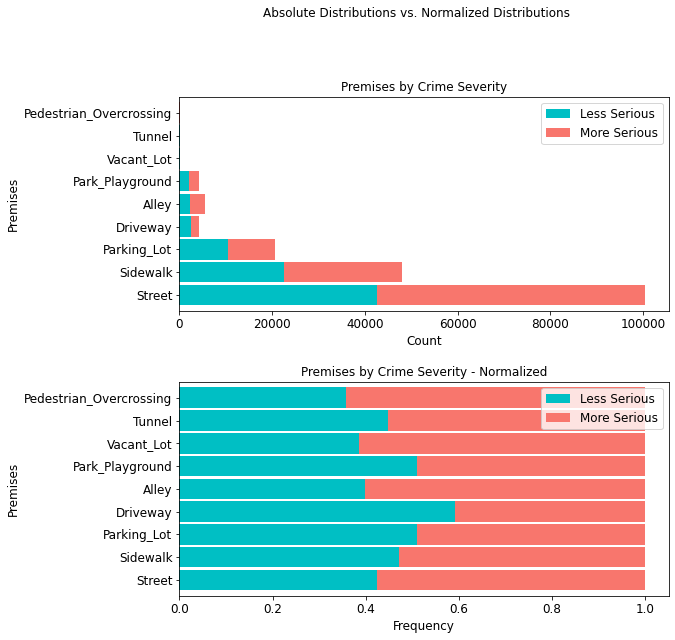

In [58]:
stacked_plot(10, 10, 10, df, 'Premises', 'crime_severity', 'Less Serious', 'barh', 
             'Premises by Crime Severity', 'Count', 'Premises', 0.9, 0, 
             'Premises by Crime Severity - Normalized', 'Frequency', 
             'Premises')
plt.savefig(eda_image_path + '/premises_bargraph.png', bbox_inches='tight')

## Histogram Distributions Colored by Crime Code Target

In [59]:
# read in the train set since we are inspecting ground truth only on this subset
# to avoid exposing information from the unseen data 
train_set = pd.read_csv(train_path).set_index('OBJECTID')

In [60]:
def colored_hist(target, nrows, ncols, x, y, w_pad, h_pad):
    '''
    Inputs:
        target: ground truth column
        nrows: number of histogram rows to include in plot
        ncols: number of histogram cols to include in plot
        x: x-axis figure size
        y: y-axis figure size
        w_pad: width padding for plot
        h_pad: height padding for plot
    '''
    # create empty list to enumerate columns from
    list1 = train_set.drop(columns={target})
    # set the plot size dimensions
    fig, axes = plt.subplots(nrows, ncols, figsize=(x, y))
    ax = axes.flatten()
    for i, col in enumerate(list1):
        train_set.pivot(columns=target)[col].plot(kind='hist', density=True, 
                                                        stacked=True, ax=ax[i])
        ax[i].set_title(col)
        ax[i].set_xlabel('Values')
        ax[i].legend(loc='upper right')
        
    fig.tight_layout(w_pad=w_pad, h_pad=h_pad)

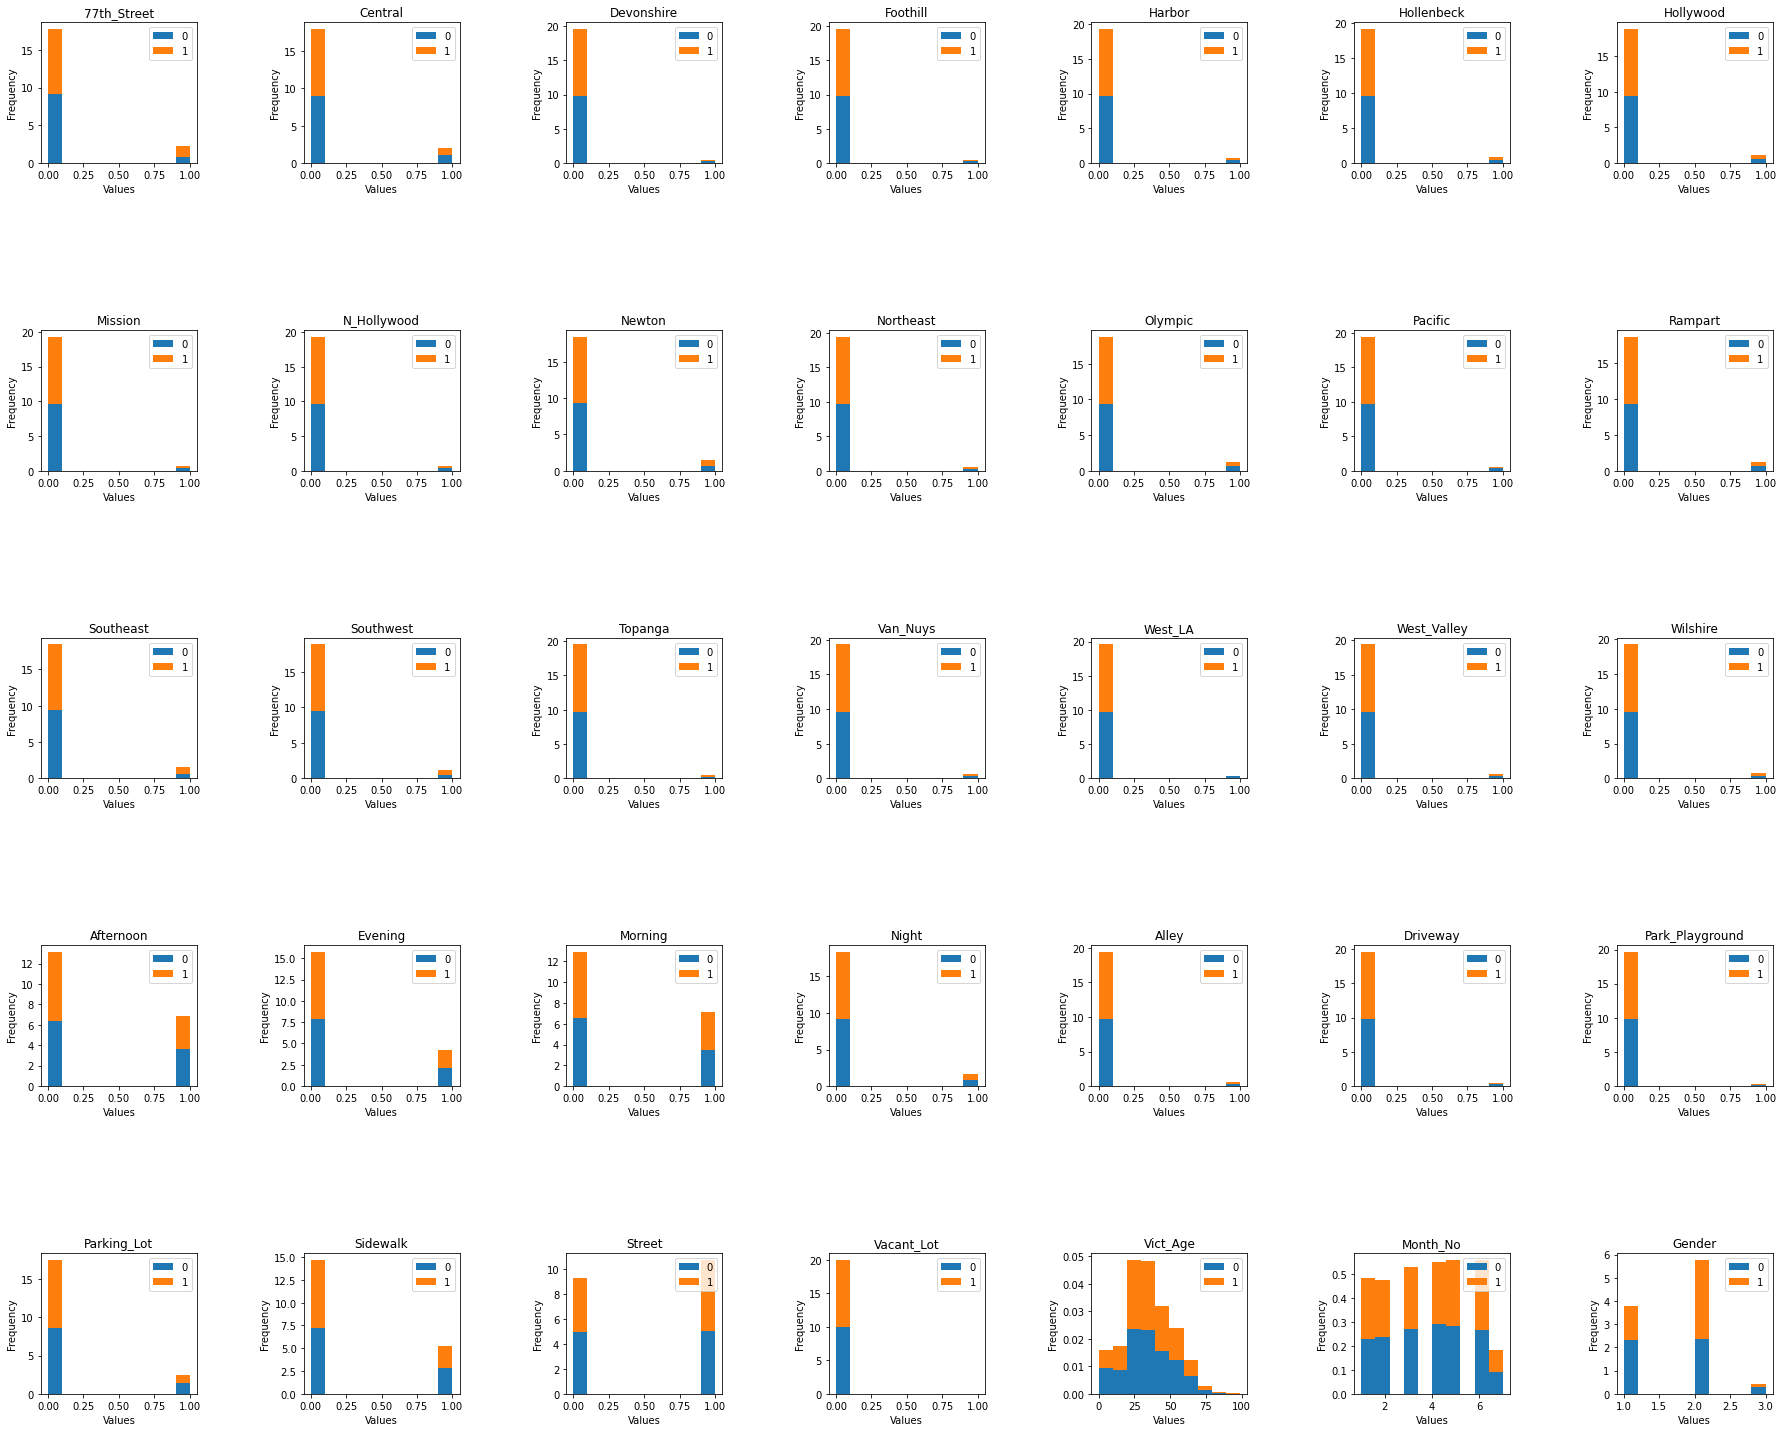

In [61]:
colored_hist('Crime_Code', 5, 7, 25, 20, 6, 12)
plt.savefig(eda_image_path + '/colored_hist.png', bbox_inches='tight')

## Examining Possible Correlation

In [62]:
# this function is defined and used only once; hence, it remains in 
# this notebook
def corr_plot(df, x, y):
    '''
    Inputs:
        df: dataframe to ingest into the correlation matrix plot
        x: x-axis size
        y: y-axis size
    '''
    # correlation matrix title
    print("\033[1m"+'La Crime Data: Correlation Matrix'+"\033[1m")
    # assign correlation function to new variable
    corr = df.corr()
    matrix = np.triu(corr) # for triangular matrix
    plt.figure(figsize=(x,y))
    # parse corr variable intro triangular matrix
    sns.heatmap(df.corr(method='pearson'), 
                annot=True, linewidths=.5, cmap='coolwarm', mask=matrix,
                square=True, 
                cbar_kws={'label': 'Correlation Index'}) 

La Crime Data: Correlation Matrix


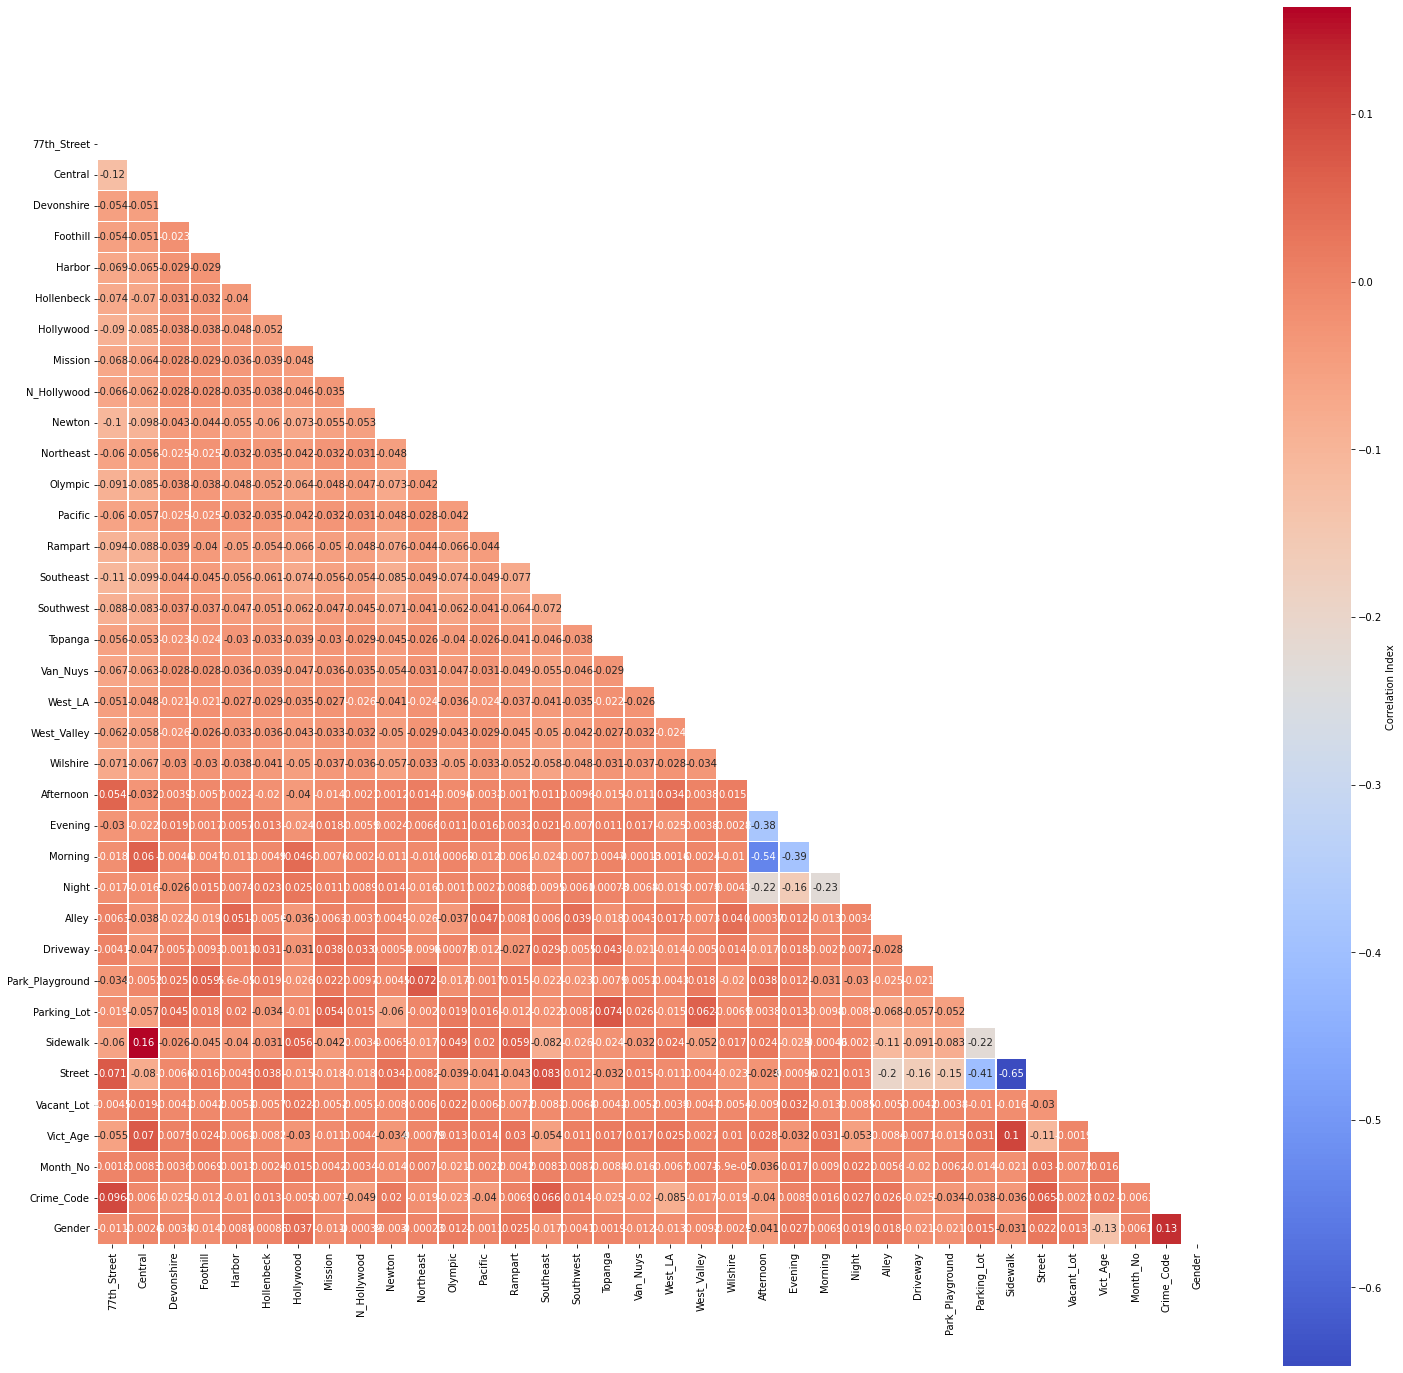

In [63]:
# subset train set without index into new corr_df dataframe
corr_df = train_set.reset_index(drop=True)

# plot the correlation matrix
corr_plot(corr_df, 25, 25)
plt.savefig(eda_image_path + '/correlation_plot.png', bbox_inches='tight')

No multicollinearity has been detected at a threshold of *r*=0.75.

# Modeling

In [64]:
# bring in original dataframe only for join purposes
train_set = pd.read_csv(train_path).set_index('OBJECTID')
valid_set = pd.read_csv(valid_path).set_index('OBJECTID')
test_set = pd.read_csv(test_path).set_index('OBJECTID')

In [65]:
# print the training 
print('The training set is', train_set.shape[0], 'rows and', train_set.shape[1],
      'columns.')
print('The validation set is', valid_set.shape[0], 'rows and', valid_set.shape[1],
      'columns.')
print('The testn set is', test_set.shape[0], 'rows and', test_set.shape[1],
      'columns.')

The training set is 21036 rows and 36 columns.
The validation set is 10518 rows and 36 columns.
The testn set is 10518 rows and 36 columns.


In [66]:
# subset the inputs for train and val (X_train, y_train, respectively) as 
# only input features, omitting the crime code truthing columns.
X_train = train_set.drop(columns=['Crime_Code'])
y_train = pd.DataFrame(train_set['Crime_Code'])

X_val = valid_set.drop(columns=['Crime_Code'])
y_val = pd.DataFrame(valid_set['Crime_Code'])

## Models

### Quadratic Discriminant Analysis (QDA)

A form of nonlinear discriminant analysis (Quadratic Discriminant Analysis) is used with an assumption that the data follows a Gaussian distribution such that a "class-specific covariance structure can be accommodated" (Kuhn & Johnson, 2016, p. 330). This method is used to improve performance over a standard Linear Discriminant Analysis (LDA) whereby the class boundaries are linearly separable. It does not require hyperparameters because it has a closed-form solution (Pedregosa et al., 2011).

In [67]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict on val set
qda_pred = qda.predict(X_val)
# extract predicted probabilities for validation set
qda_proba = qda.predict_proba(X_val)[:,1]

### Logistic Regression

Logistic regression is deployed next for its ability to handle binary classification tasks with relative ease. The generalized linear model takes the following form:

$$y = \beta_0 + \beta_1x_1 +\beta_2x_2 +\cdots+\beta_px_p + \varepsilon$$

Describing the relationship between several important coefficients and features in the dataset can be modeled parametrically in the following form:


$$(\hat{\text{Crime Code}}) = \frac{\text{exp}(b_0+{b_1(\text{Victim Age}})+{b_2(\text{Month}})+b_3(\text{Victim Sex})+\cdot\cdot\cdot+b_px_p)}{1+\text{exp}(b_0+{b_1(\text{Victim Age}})+{b_2(\text{Month}})+b_3(\text{Victim Sex})+\cdot\cdot\cdot+b_px_p)}$$

The model is iterated through a list of cost penalties from 1 to one-hundred and trained with the following hyperparameters. Solvers used were *lbfgs* and *saga*. The *l1-ratio* and maximum iterations (*max_iter*) remained constant at a rate of 0.01, and 200, respectively.

In [68]:
# logistic regression function with hyperparameter tuning
def lr_hp(solver, penalty, l1_ratio, max_iter, rstate): 
    '''
    Inputs: 
        solver = hyperparameter (default is 'lbfgs')
        penalty = norm (i.e., l1, l2, etc.,)
        ratio = l1_ratio
        cost = C, a positive float (inverse of regularization)
        maxiter = number of maximum iterations
        rstate = random state for reproducibility
    '''
    # manually tuning the logistic regression model
    C = list(range(1, 100, 10))  #cost various in a range from 1-100 by 10
    LRtrainAcc = []
    LRvalAcc = []
    for cost in C:
        lr = LogisticRegression(solver=solver, penalty=penalty, l1_ratio=l1_ratio,
                                C=cost, max_iter=max_iter, random_state=rstate)
        lr.fit(X_train, y_train) # fit the model

        lr_pred_train = lr.predict(X_train)  # Predict on train set
        tuned_lr = lr.predict(X_val)         # Predict on val set
        # append accuracy score to train and val, respectively and show over
        # each respective cost
        LRtrainAcc.append(accuracy_score(y_val, tuned_lr))
        LRvalAcc.append(accuracy_score(y_val, tuned_lr))
        print('Cost = %2.2f \t Validation Accuracy = %2.2f \t Training ' \
              'Accuracy = %2.2f'% (cost,accuracy_score(y_val, tuned_lr),
                               accuracy_score(y_train, lr_pred_train)))

    # plot training and validation accuracy by cost
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(C, LRtrainAcc, 'ro-', C, LRvalAcc,'bv--')
    ax.legend(['Training Accuracy','Validation Accuracy'])
    ax.set_title(f'Logistic Regression: Accuracy vs. Cost Over {penalty}' \
    + f' Penalty, {l1_ratio} = l1_ratio,  and {max_iter} Max Iterations')
    # plt.title('Logistic Regression: Accuracy vs. Cost')
    ax.set_xlabel('Cost'); ax.set_xscale('log')
    ax.set_ylabel('Accuracy')
    
    # accuracy and classification report (tuned model)
    print()
    print('Tuned Logistic Regression Model')
    print('Accuracy Score')
    print(accuracy_score(y_val, tuned_lr))
    print('Classification Report \n', classification_report(y_val, tuned_lr))

Cost = 1.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 11.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 21.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 31.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 41.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 51.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 61.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 71.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 81.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 91.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61

Tuned Logistic Regression Model
Accuracy Score
0.6217912150598973
Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.47      0.54      4861
           1       0.62      0.75      0.68      5657

    accuracy                           0.62     10518
  

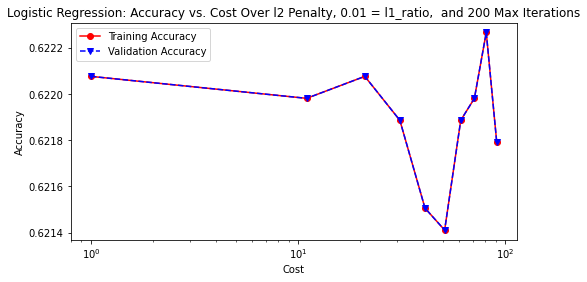

In [69]:
# tune the Logistic Regression with 'lbfgs' solver, 'l2' penalty, 
# 'l1_ratio' of 0.01, and 200 'max_iter' 
lr_hp(solver='lbfgs', penalty='l2', l1_ratio=0.01, max_iter=200, rstate=rstate)
# save the accuracy plot onto image path
plt.savefig(model_image_path + '/log_reg1_accuracy.png', bbox_inches = 'tight')

Cost = 1.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 11.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 21.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 31.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 41.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 51.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 61.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 71.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 81.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61
Cost = 91.00 	 Validation Accuracy = 0.62 	 Training Accuracy = 0.61

Tuned Logistic Regression Model
Accuracy Score
0.6219813652785701
Classification Report 
               precision    recall  f1-score   support

           0       0.62      0.47      0.54      4861
           1       0.62      0.75      0.68      5657

    accuracy                           0.62     10518
  

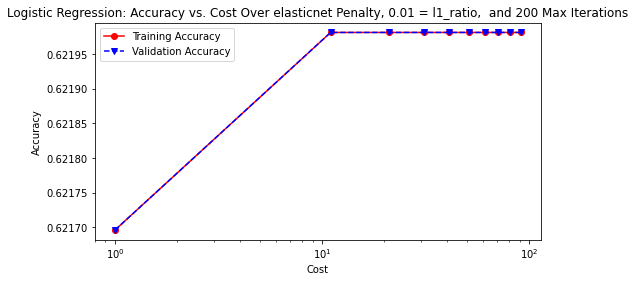

In [70]:
# tune the Logistic Regression with 'saga' solver, 'elasticnet' penalty, 
# 'l1_ratio' of 0.01, and 200 'max_iter' 
lr_hp(solver='saga', penalty='elasticnet', l1_ratio=0.01, max_iter=200, 
      rstate=rstate)
# save the accuracy plot onto image path
plt.savefig(model_image_path + '/log_reg2_accuracy.png', bbox_inches = 'tight')

In [71]:
# train and predict final LogisticRegression model 
lr = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.01, 
                        max_iter=200, random_state=rstate)
# fit the logistic regression model
lr.fit(X_train, y_train)
# Predict on val set
lr_pred = lr.predict(X_val)
# extract predicted probabilities for validation set
lr_proba = lr.predict_proba(X_val)[:, 1]

### Decision Tree Classifier

The remainder of the modeling stage commences with the application of tree-based classifiers. Basic classification trees facilitate data partitioning "into smaller, more homogeneous groups" (Kuhn & Johnson, 2016, p. 370). Instantiating a Decision Tree Classifier at a maximum depth (*max_depth*) of 2 is a good baseline for illustrating the effects of a minimum sample split to arrive at a pure node, but a more realistic depth of fifteen provides a more realistic and interpretable framework from which to assess subsequent classifiers with. No other hyperparameters are tuned.

In [72]:
# assign new variable to decision tree classifier and set max_depth=2
# for small tree depth size such that the tree can be effectively plotted
dec_tree = DecisionTreeClassifier(max_depth=2)
# fit the tree
dec_tree.fit(X_train, y_train)
# Predict on val set
dec_tree_pred =  dec_tree.predict(X_val)
# extract predicted probabilities for validation set
dec_tree_proba = dec_tree.predict_proba(X_val)[:,1]

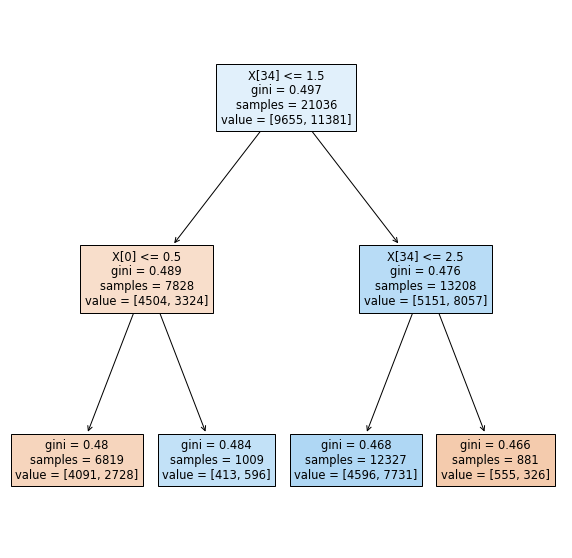

In [73]:
# plot the decision tree at a max_depth=2
fig, ax = plt.subplots(figsize = (10,10))

short_tree = tree.plot_tree(dec_tree, filled=True)
# save the accuracy plot onto image path
plt.savefig(model_image_path + '/decision_tree.png', bbox_inches = 'tight')

In [74]:
# assign new variable to decision tree classifier and set max_depth=15
tree = DecisionTreeClassifier(max_depth=15)
# fit the decision tree
tree.fit(X_train, y_train)
# Predict on val set
tree_pred =  tree.predict(X_val)
# extract predicted probabilities for validation set
tree_proba = tree.predict_proba(X_val)[:,1]

### Random Forest Classifier

Combining a baseline decision tree model with a bootstrapped aggregation (bagging) allowed for the first ensemble method of the Random Forest Classifier to be introduced. The model was iterated through a list of maximum depths ranging from fifteen to twenty and trained and with the *gini* and *entropy* hyperparameters.

In [75]:
# random forest function with hyperparameter tuning
def rf_hp(criterion, rstate):
    '''
    Inputs:
        criterion: used to measure split quality; gini is default 
        rstate: random state 
    '''
    # Random Forest Tuning (Manual)
    rf_train_accuracy = []
    rf_val_accuracy = []
    # max_depth various from 15-20 in a for loop
    max_depth = list(range(15, 21))
    for n in max_depth:
        rf = RandomForestClassifier(max_depth=n, criterion=criterion, 
                                    random_state=rstate)
        rf = rf.fit(X_train, y_train) # fit the classifier
        rf_pred_train = rf.predict(X_train) # predict on training set
        rf_pred_val = rf.predict(X_val) # predict on validation set
        # append accuracy score to train and val, respectively and show over
        # each respective max_depth
        rf_train_accuracy.append(accuracy_score(y_train, rf_pred_train))
        rf_val_accuracy.append(accuracy_score(y_val, rf_pred_val))
        print('Max Depth = %2.0f \t val Accuracy = %2.2f \t' \
              'Training Accuracy = %2.2f'% (n, accuracy_score(y_val, 
                                                              rf_pred_val),
                                            accuracy_score(y_train, 
                                                           rf_pred_train)))
    # plot training and validation accuracy
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(max_depth, rf_train_accuracy, 'bv--', label='Training Accuracy')
    ax.plot(max_depth, rf_val_accuracy, 'ro--', label='Validaiton Accuracy')
    ax.legend(['Training Accuracy','Validation Accuracy'])
    ax.set_title(f'Random Forest Accuracy for {criterion.capitalize()}' + \
                 ' Criterion')
    ax.set_xlabel('Depth')
    ax.set_ylabel('Accuracy')
    
    # accuracy and classification report
    print()
    print('Tuned Random Forest Model')
    print('Accuracy Score', '\n')
    print(accuracy_score(y_val, rf_pred_val))
    print('Classification Report \n', 
          classification_report(y_val, rf_pred_val))

Max Depth = 15 	 val Accuracy = 0.77 	Training Accuracy = 0.83
Max Depth = 16 	 val Accuracy = 0.79 	Training Accuracy = 0.86
Max Depth = 17 	 val Accuracy = 0.81 	Training Accuracy = 0.88
Max Depth = 18 	 val Accuracy = 0.82 	Training Accuracy = 0.90
Max Depth = 19 	 val Accuracy = 0.84 	Training Accuracy = 0.92
Max Depth = 20 	 val Accuracy = 0.85 	Training Accuracy = 0.93

Tuned Random Forest Model
Accuracy Score 

0.8464536984217532
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      4861
           1       0.83      0.89      0.86      5657

    accuracy                           0.85     10518
   macro avg       0.85      0.84      0.84     10518
weighted avg       0.85      0.85      0.85     10518



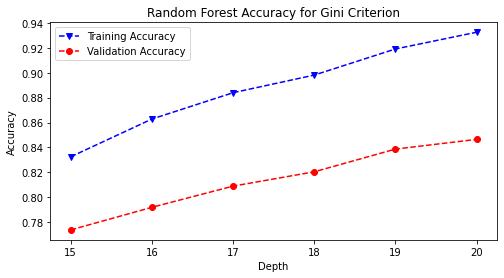

In [76]:
# run the random forest function, varying over max_depth of 15-20 as defined
# in rf_hp function
rf_hp('gini', rstate)
# save the accuracy plot onto image path
plt.savefig(model_image_path + '/rand_forest_gini_accuracy.png', 
            bbox_inches = 'tight')

Max Depth = 15 	 val Accuracy = 0.77 	Training Accuracy = 0.83
Max Depth = 16 	 val Accuracy = 0.79 	Training Accuracy = 0.85
Max Depth = 17 	 val Accuracy = 0.80 	Training Accuracy = 0.87
Max Depth = 18 	 val Accuracy = 0.82 	Training Accuracy = 0.90
Max Depth = 19 	 val Accuracy = 0.83 	Training Accuracy = 0.91
Max Depth = 20 	 val Accuracy = 0.85 	Training Accuracy = 0.93

Tuned Random Forest Model
Accuracy Score 

0.8495911770298535
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      4861
           1       0.84      0.89      0.86      5657

    accuracy                           0.85     10518
   macro avg       0.85      0.85      0.85     10518
weighted avg       0.85      0.85      0.85     10518



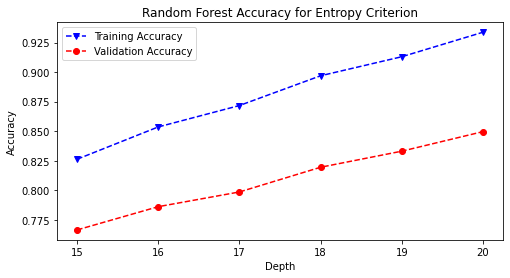

In [77]:
# run the random forest function with entropy criterion, varying over max_depth 
# of 15-20 as defined in rf_hp function
rf_hp('entropy', rstate)
# save the accuracy plot onto image path
plt.savefig(model_image_path + '/rand_forest_entropy_accuracy.png', 
            bbox_inches = 'tight')

In [78]:
# train and predict final RandomForest model 
rf = RandomForestClassifier(max_depth=20, criterion='entropy', 
                            random_state=rstate)
rf.fit(X_train, y_train) # fit the classifier
rf_pred = rf.predict(X_val) # Predict on val set
# extract predicted probabilities for validation set
rf_proba = rf.predict_proba(X_val)[:, 1]

### XGBoost

XGBoost is the final model trained on the dataset for its scalability in a wide variety of end-to-end classification tasks. Parallelized computing allows for the algorithm to run "more than ten times faster than existing popular solutions on a single machine and scales to billions of examples in distributed or memory-limited settings" (Chen & Guestrin, 2016). Therefore, this gradient boosting ensemble method was chosen to supplement the preceding tree-based classifiers. 

The model can be summarized in the following equation:

$$\hat y_i = \large \sum_{k=1}^k f_k(x_i), f_k \epsilon \mathcal{F} $$

where output $\hat y_i$ is predicted via a summation of $k$ number of trees, where $f$ is the functional space of $\mathcal{F}$.

In [79]:
def xgb_hp(lr, rstate):
    '''
    Inputs: 
        lr: learning rate
        rstate: random state for reproducibility
    '''
    # XGBoost tuning 
    xgb_train_accuracy = []
    xgb_val_accuracy = []
    max_depth = list(range(20, 31)) # max depth from 20-30 
    for n in max_depth:
        xgb = XGBClassifier(max_depth=n, tree_method='hist', # speeds up time
                            learning_rate=lr, n_estimators=250, 
                            random_state=rstate, n_jobs=-1) # uses all cores
        xgb = xgb.fit(X_train, y_train) # fit the xgboost classifier
        xgb_pred_train = xgb.predict(X_train) # predict on training set
        xgb_pred_val = xgb.predict(X_val)     # predict on validation set
        # append accuracy score to train and val, respectively and show over
        # each respective max_depth
        xgb_train_accuracy.append(accuracy_score(y_train, xgb_pred_train))
        xgb_val_accuracy.append(accuracy_score(y_val, xgb_pred_val))
        print('Max Depth = %2.0f \t Validation Accuracy = %2.2f \t' \
              'Training Accuracy = %2.2f' %(n, accuracy_score(y_val, 
                                            xgb_pred_val),
                                            accuracy_score(y_train, xgb_pred_train)))
    # plot training and validation accuracy
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(max_depth, xgb_train_accuracy, 'bv--', label='Training Accuracy')
    ax.plot(max_depth, xgb_val_accuracy, 'ro--', label='Validation Accuracy')
    ax.set_title('XGBoost Accuracy by Depth')
    ax.set_xlabel('Depth')
    ax.set_ylabel('Accuracy')
    plt.legend()

    # accuracy and classification report
    print()
    print('Tuned XGBoost Model')
    print('Accuracy Score', '\n')
    print(accuracy_score(y_val, xgb_pred_val))
    print('Classification Report \n', classification_report(y_val, xgb_pred_val))

Max Depth = 20 	 Validation Accuracy = 0.88 	Training Accuracy = 0.98
Max Depth = 21 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 22 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 23 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 24 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 25 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 26 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 27 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 28 	 Validation Accuracy = 0.88 	Training Accuracy = 0.98
Max Depth = 29 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98
Max Depth = 30 	 Validation Accuracy = 0.89 	Training Accuracy = 0.98

Tuned XGBoost Model
Accuracy Score 

0.8855295683590036
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4861
           1       0.89      0.90      0

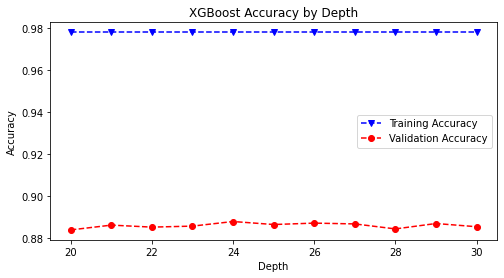

In [80]:
# run the xgboost function with 0.5 learning rate, varying over max_depth 
# of 20-30 as defined in xgb_hp function
xgb_hp(lr=0.5, rstate=rstate)
# save the accuracy plot onto image path
plt.savefig(model_image_path + '/xgboost_accuracy.png', bbox_inches = 'tight')

In [81]:
# train and predict final XGBoost model 
xgb = XGBClassifier(max_depth=31, lr=0.5, random_state=rstate)
xgb.fit(X_train, y_train) # fit the classifier
xgb_pred = xgb.predict(X_val) # Predict on val set
# extract predicted probabilities for validation set
xgb_proba = xgb.predict_proba(X_val)[:, 1]

## Model Evaluation

### Confusion Matrices

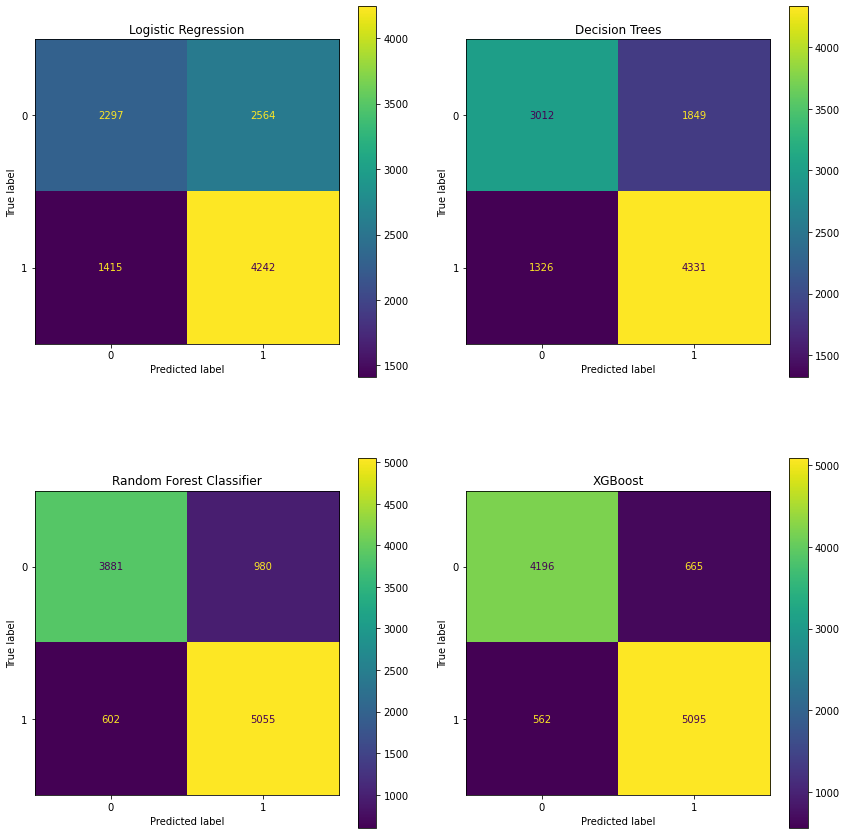

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
flat = axes.flatten()
fig.tight_layout(w_pad=2, h_pad= 6)

# Quadratic Discriminant Analysis confusion matrix is omitted since its results
# are at the baseline level
# Logistic Regression confusion matrix
plot_confusion_matrix(lr, X_val, y_val, ax=flat[0])
flat[0].set_title('Logistic Regression')

# Decision Tree confusion matrix
plot_confusion_matrix(tree, X_val, y_val, ax=flat[1])
flat[1].set_title('Decision Trees')

# Random Forest confusion matrix
plot_confusion_matrix(rf, X_val, y_val, ax=flat[2])
flat[2].set_title('Random Forest Classifier')

# XGBoost confusion matrix
plot_confusion_matrix(xgb, X_val, y_val, ax=flat[3])
flat[3].set_title('XGBoost')

# save the confusion matrices onto image path
plt.savefig(model_image_path + '/confusion_matrices.png', bbox_inches='tight')

plt.show()

The XGBoost model shows 5,121 true positives (contributing to the highest sensitivity of all models).

### ROC Curves

ROC Curves were plotted for each respective model to assess model performance.

In [83]:
# function for plotting roc curves
def roc_plots(est_name, name, ax=None):
    '''
    Inputs:
        est_name: model name (variable)
        name: model name (string)
        ax=None: axis
    Output:
        ax: axis
    '''
    roc = metrics.roc_curve(y_val, est_name)
    fpr,tpr,thresholds = metrics.roc_curve(y_val, est_name)
    auc = metrics.auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
        plt.title('')
        plt.xlabel('') 
        plt.ylabel('') 
        plt.legend('') 
    ax.plot(fpr, tpr, label=f'{name}; AUC = {auc:.2}', linewidth=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
    return ax    

In [84]:
# create a dataframe for the models that were run
models = pd.DataFrame({'qda': qda_proba, 'log': lr_proba, 'rf': rf_proba, 
                       'tree': tree_proba, 'xgb': xgb_proba, 
                       'y_val': y_val['Crime_Code'].values})

# save out the models into a .csv file to be used with dash plotly
models.to_csv(data_folder + 'models.csv', index=False)

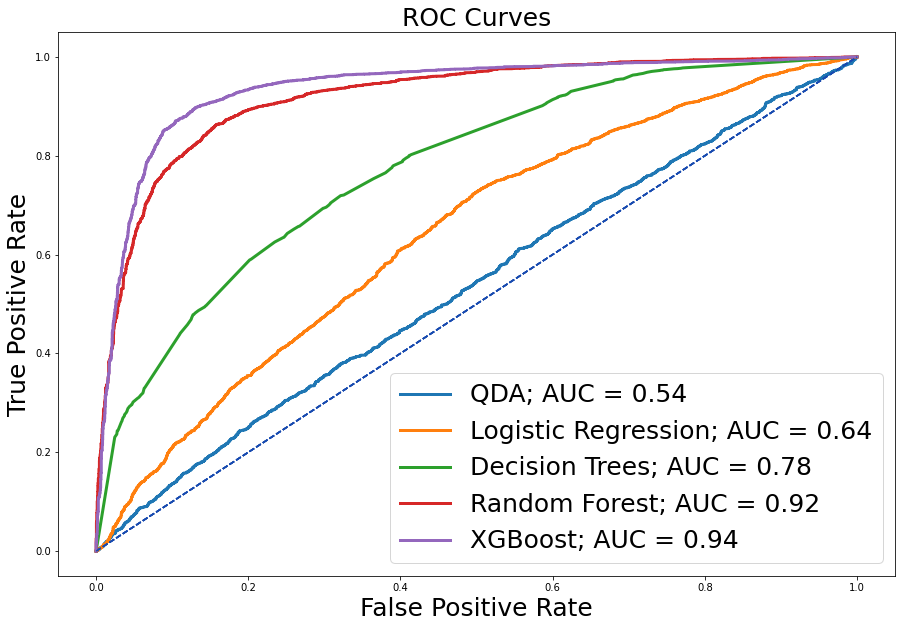

In [85]:
# plot the roc curves using the roc_plots function
ax = roc_plots(est_name=qda_proba, name='QDA')
roc_plots(est_name=lr_proba, name='Logistic Regression', ax=ax)
roc_plots(est_name=tree_proba, name='Decision Trees', ax=ax)
roc_plots(est_name=rf_proba, name='Random Forest', ax=ax)
roc_plots(est_name=xgb_proba, name='XGBoost', ax=ax)
plt.title('ROC Curves', fontsize=25)
plt.xlabel('False Positive Rate', fontsize=25)
plt.ylabel('True Positive Rate', fontsize=25)
plt.legend(loc='lower right', fontsize=25);
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_curves.png', bbox_inches = 'tight')

Determining the model for deployment involves a comprehensive inspection of all area under the receiver operating characteristic (AUROC) curves.
As you can see here, we have our introductory QDA model with an auc of 0.54, which is barely above the baseline. Logistic regression makes a 10% improvement to an AUC of 0.64, followed by the Decision Tree that adds another 14% to an AUC of 0.78, and performance keeps improving, especially with these more complex tree-based classifiers, where we now see the best performing model of XGB with an auc of 0.94. However, sensitivity and false alarm rates should also be considered as additional measures of performance assessment.

### Performance Metrics

In [86]:
# function that generates auc values for any given value
def roc_auc(est_name):
    '''
    Input: 
        est_name: name of model(estimator/algorithn)
    Output:
        auc: auc score
    '''
    roc = metrics.roc_curve(y_val, est_name)
    fpr,tpr,thresholds = metrics.roc_curve(y_val, est_name)
    auc = metrics.auc(fpr, tpr)
    return auc

In [87]:
models = {'QDA': qda_pred, 'Logistic Regression': lr_pred, 
          'Decision Tree': tree_pred, 'Random Forest': rf_pred, 
          'XGBoost': xgb_pred}
metrics_dict = {}
for key, val in models.items():
    report = classification_report(y_val, val, output_dict=True)
    metrics_dict[key] = [round(report['accuracy'],4), 
                         round(report['1']['precision'],4), 
                         round(report['1']['recall'],4),
                         round(report['1']['f1-score'],4) ]

In [88]:
table1 = PrettyTable()
table1.field_names = ['Model', 'Validation Accuracy', 'Precision', 
                      'Recall', 'F1-score']

for key, val in metrics_dict.items():
    table1.add_row([key] + val)
print(table1)

# Mean-Squared Errors
table2 = PrettyTable()
table2.field_names = ['Model', 'AUC', 'MSE']

for key, val in models.items():
    table2.add_row([key,  round(roc_auc(val),4),
                    round(mean_squared_error(y_val, val),4)])
print(table2)

+---------------------+---------------------+-----------+--------+----------+
|        Model        | Validation Accuracy | Precision | Recall | F1-score |
+---------------------+---------------------+-----------+--------+----------+
|         QDA         |        0.4953       |   0.6071  | 0.1748 |  0.2715  |
| Logistic Regression |        0.6217       |   0.6233  | 0.7499 |  0.6807  |
|    Decision Tree    |        0.6981       |   0.7008  | 0.7656 |  0.7318  |
|    Random Forest    |        0.8496       |   0.8376  | 0.8936 |  0.8647  |
|       XGBoost       |        0.8833       |   0.8845  | 0.9007 |  0.8925  |
+---------------------+---------------------+-----------+--------+----------+
+---------------------+--------+--------+
|        Model        |  AUC   |  MSE   |
+---------------------+--------+--------+
|         QDA         | 0.5216 | 0.5047 |
| Logistic Regression | 0.6112 | 0.3783 |
|    Decision Tree    | 0.6926 | 0.3019 |
|    Random Forest    | 0.846  | 0.1504 |
|   

One metric alone should not drive performance evaluation. Therefore, accuracy, precision, recall, *f1*, and AUC scores were considered. These tables show the performance metrics for all trained and validated models in order that they were implemented and AUC scores in comparison with each model’s mean squared errors. XGBoost outperformed all other models based on highest accuracy (0.8885), precision (0.8894), recall (0.9053), and *f1*-score (0.8972). Moreover, it showed the highest AUC score (0.8871) and lowest mean squared error (0.1115).

## XGBoost Predictions

The predictions from the XGBoost model are joined back to the validation holdout set on the index `(OBJECTID)` such that these predictions can be further used to assess model performance on categorical variables of interest.

In [89]:
# create copy of validation set to join xgb model predictions to
df_predictions_xgb = valid_set.copy()
# join the xgb model predictions to validation set copy
df_preds_xgb = pd.concat([X_val, y_val], axis=1)
df_preds_xgb['Predictions'] = xgb_proba

In [90]:
df_preds_xgb.head() # inspect xgboost predictions 

,77th_Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N_Hollywood,Newton,...,Park_Playground,Parking_Lot,Sidewalk,Street,Vacant_Lot,Vict_Age,Month_No,Gender,Crime_Code,Predictions
OBJECTID,,,,,,,,,,,,,,,,,,,,,
62203,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,46,6,2,0,0.06
233319,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,32,6,2,1,0.92
95157,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,26,6,1,1,0.32
83900,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,28,1,1,1,0.68
61476,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,57,5,1,1,0.49


In [91]:
# write out the xgboost predictions to file on path
df_preds_xgb.to_csv(data_folder + 'df_preds_xgb.csv')

In [92]:
# function for plotting categorical column roc curves
def plot_roc_preds(df, title, column):   
    ''' 
    This function creates roc curves plot for predictions
    Inputs:
        df_preds: dataframe with appended predictions
        title: title of the plot
        column: column to look at (i.e., 'Age', etc.)
        dictionary: key-value pair mapping for column
    '''
    
    # filter by each unique value in column    
    for value, filtered_preds in df.groupby(column):
        filtered_preds = df[df[column]==value]
        
        if filtered_preds.shape[0] > 0:
            # plot roc curve
            fpr, tpr, thresholds = metrics.roc_curve(filtered_preds['Crime_Code'], 
                                                     filtered_preds['Predictions'])
            y_preds = df[df[column]==value]['Predictions'] # predictions column
            y_true = df[df[column]==value]['Crime_Code'] # ground truth column
            count = len(y_true)
            len_h0 = len(y_true[y_true==0]) # where ground truth = 0
            len_h1 = len(y_true[y_true==1]) # where ground truth = 1
            
            if len_h0 and len_h1:
                roc_auc = metrics.auc(fpr, tpr)
                # make the plot 
                plt.rcParams["figure.figsize"] = [16, 10] # plotting figure size
                plt.title(title)
                plt.plot(fpr, tpr, label = f'AUC for {value} = {roc_auc:.3f},'
                                          f' count: {len(y_true)}, H0: {len_h0},'
                                          f' H1: {len_h1}')
                plt.plot([0, 1], [0, 1], 'r--')
                plt.xlim([0, 1])
                plt.ylim([0, 1])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.legend(loc="lower right") 

In [93]:
# save entire original dataframe (pre-modeling) to new variable for subsequent
# joining/concatenation based on 'OBJECTID' index
df = pd.read_csv(data_frame).set_index('OBJECTID')

In [94]:
# join columns of interest from eda datframe to the prediction dataframe
# for further ROC Curve analysis
df_preds_roc= df_preds_xgb.join(df[['Type', 'age_bin', 'Victim_Sex', 
                                    'Victim_Desc', 'Time_of_Day', 'Month', 
                                    'AREA_NAME']], how='left')

In [95]:
# drop individual streets from new dataframe, since we are not interested in
# investing performance operating points at this granularity. However, 
# street tpes, age groups, time of day, and month are retained such that
# this analysis can be made
df_preds_roc = df_preds_roc.drop(columns=['77th_Street', 'Central', 'Devonshire', 
                                          'Foothill', 'Harbor', 'Hollenbeck', 
                                          'Hollywood', 'Mission', 'N_Hollywood',
                                          'Newton','Northeast', 'Olympic', 
                                          'Pacific', 'Rampart', 'Southeast', 
                                          'Southwest','Topanga', 'Van_Nuys', 
                                          'West_LA', 'West_Valley', 'Wilshire',
                                          # remove individual time of day cols
                                          # since these are already contained
                                          # within 'Time_of_Day' col
                                          'Afternoon', 'Evening', 'Morning', 
                                          'Night',
                                          # remove individual street type cols
                                          # since these are already contained
                                          # within 'Type' column
                                          'Alley', 'Driveway', 'Park_Playground', 
                                          'Parking_Lot', 'Sidewalk', 'Street', 
                                          'Vacant_Lot', 
                                          # remove 'Month_No' col since relvant
                                          # info is contained within 'Month' col
                                          'Month_No',
                                          # remove 'Vict_Age' since we have 
                                          # binned it as 'age_bin'
                                          'Vict_Age',
                                          # drop gender in lieu of 'Victim_Sex'
                                          'Gender'],
                                          errors='ignore')

# create dictionary for renaming certain columns
options = {'age_bin': 'Age Bin',  'Type': 'Type', 'Victim_Sex': 'Victim Sex', 
           'Victim_Desc': 'Victim Descent', 'Time_of_Day': 'Time of Day', 
           'Month': 'Month', 'AREA_NAME': 'Area Name', 'Premises': 'Premises'}

df_preds_roc = df_preds_roc.rename(columns=options) # rename the columns

In [96]:
# write out the df_preds (+) joined columns of interest file to csv on path
df_preds_roc.to_csv(data_folder + 'df_preds_roc.csv', index=False)

### ROC Curves by Month of Crime

Month over month, the operating points of the ROC are consistent. However, it is interesting to note that the month of March captures a high sensitivity for predicting serious crimes (~50%) before receiving any false alarms.

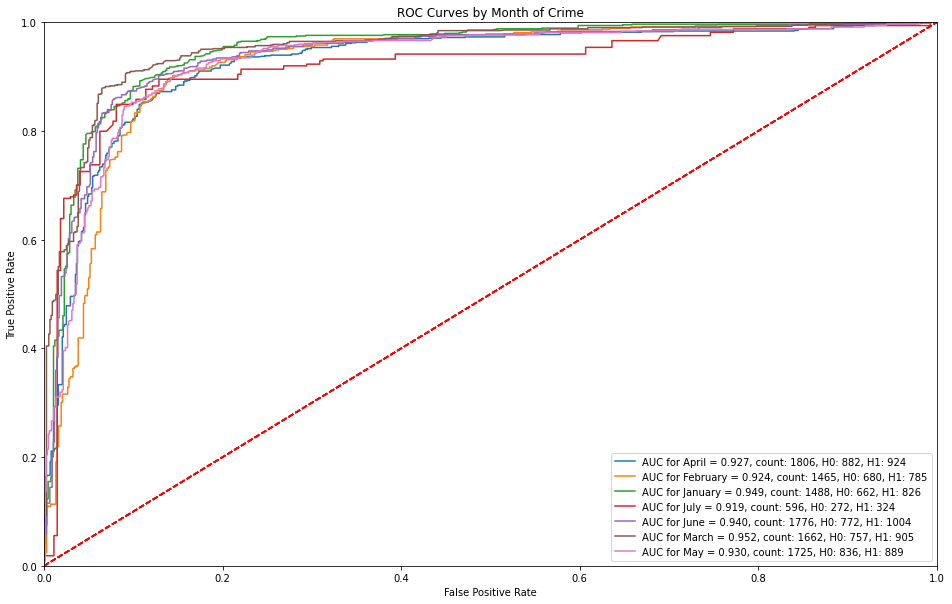

In [97]:
# roc curves by month of crime
plot_roc_preds(df_preds_roc, 'ROC Curves by Month of Crime', 'Month')
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_by_month.png', bbox_inches = 'tight')

### ROC Curves by Time of Day

Evening captures a higher sensitivity (true positive rate) prior to receiving any false alarms. Night predictions receive false alarms at a sensitivity of approximately 40%.

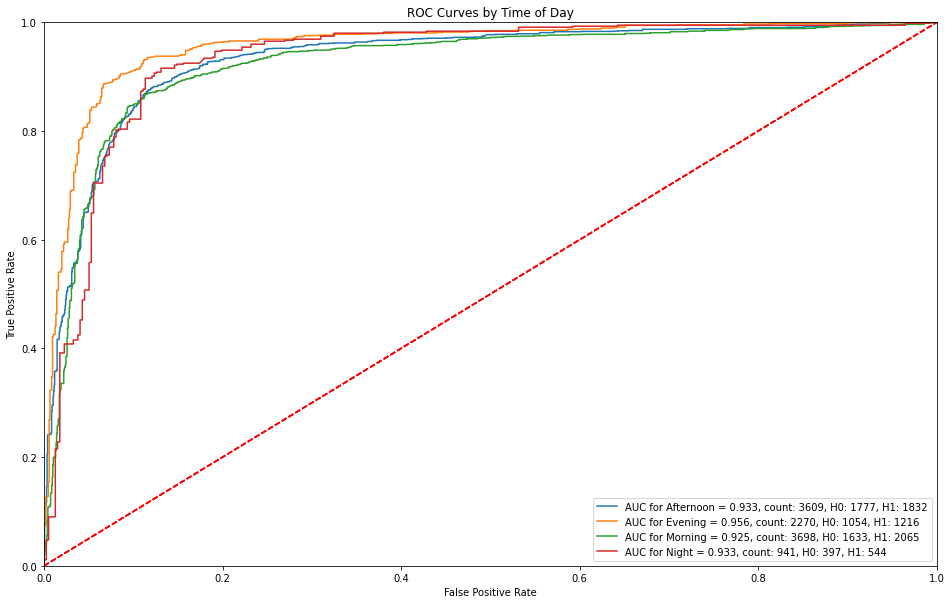

In [98]:
# roc curves by time of day
plot_roc_preds(df_preds_roc, 'ROC Curves by Time of Day', 'Time of Day')
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_by_time_of_day.png', bbox_inches = 'tight')

### ROC Curves by Street Type

Alleys have an immediate false alarm of over 20% and no true positive rate. Otherways primary streets receive a higher sensitivity before countering with a false alarm rate (1-specificity).

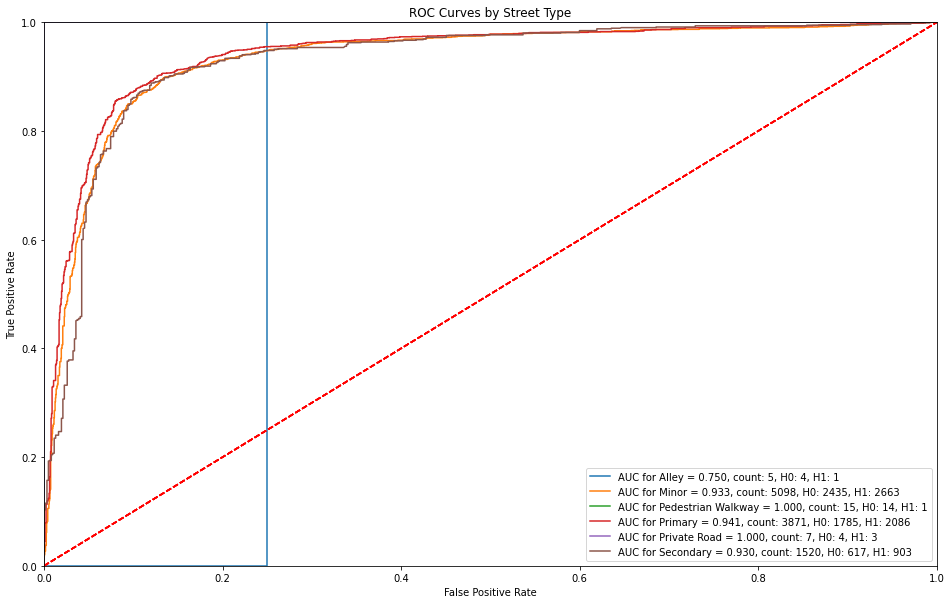

In [99]:
# plot roc curves by street type
plot_roc_preds(df_preds_roc, 'ROC Curves by Street Type', 'Type')
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_by_street_type.png', bbox_inches = 'tight')

### ROC Curves by Age Group

The XGBoost model is able to successfully make predictions with a high sensitivity without any false alarms with the exception of age bins of 75-80 and 85-90 where there are higher false alarms at lower sensitivities 


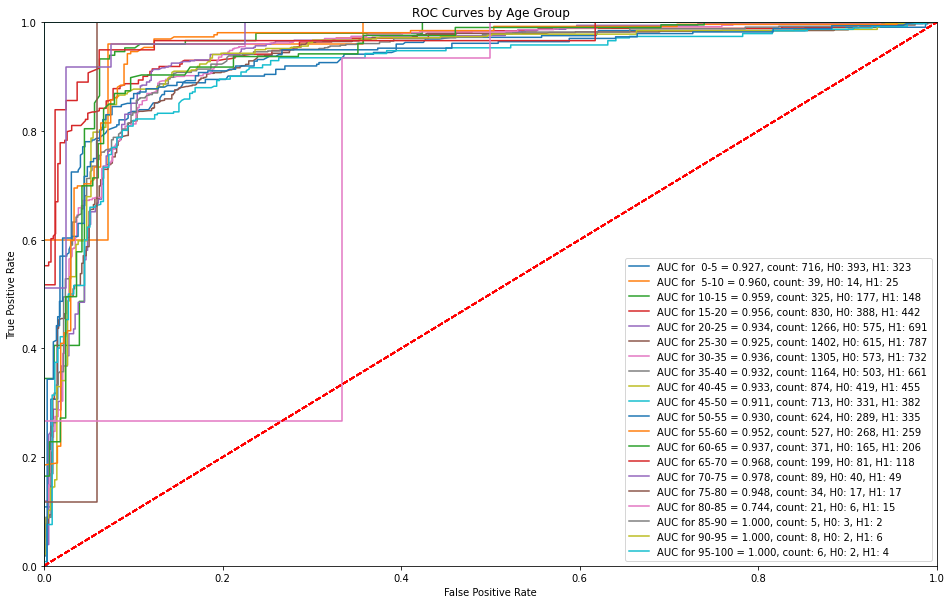

In [100]:
# plot roc curves by street age group
plot_roc_preds(df_preds_roc, 'ROC Curves by Age Group', 'Age Bin')
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_by_age.png', bbox_inches = 'tight')

### ROC Curves by Victim Sex

Victim sex is for the most part, consistent throughout, but those sexes that remain unknown have higher detection rates before getting any false alarms.

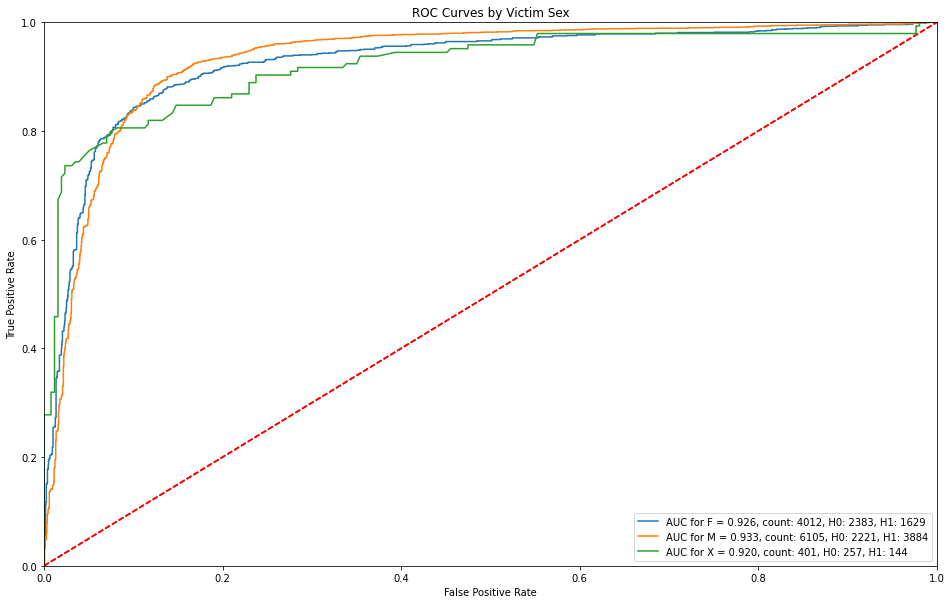

In [101]:
# plot roc curves by street sex
plot_roc_preds(df_preds_roc, 'ROC Curves by Victim Sex', 'Victim Sex')
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_by_sex.png', bbox_inches='tight')

### ROC Curves by Area Name

In terms of location or specific areas in Los Angeles, North Hollywood stands out in terms of receiving higher false alarms with respect to lower sensitivities.

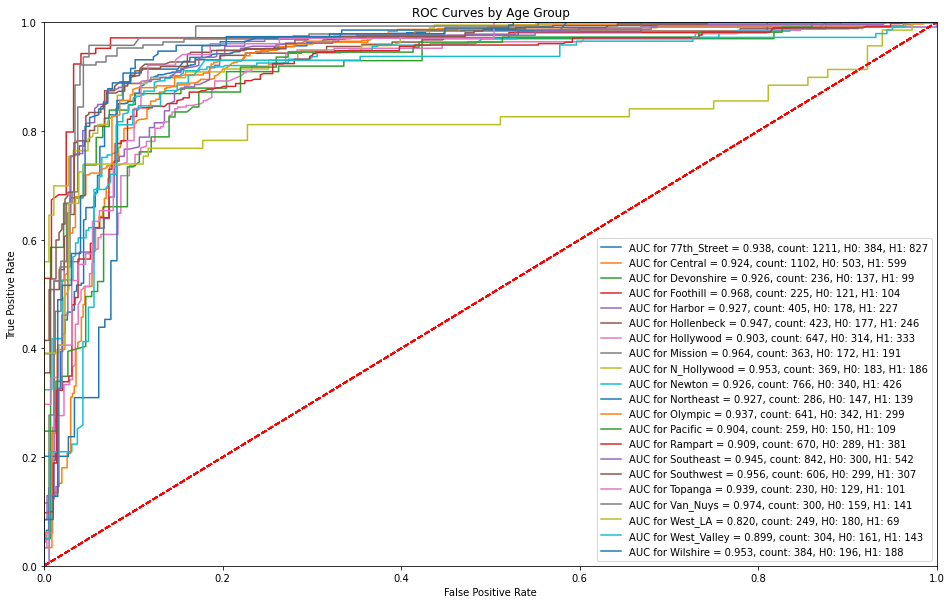

In [102]:
# plot roc curves by area name
plot_roc_preds(df_preds_roc, 'ROC Curves by Age Group', 'Area Name')
# save the roc plot onto image path
plt.savefig(model_image_path + '/roc_by_area.png', bbox_inches='tight')

## Compare Predictions of Top Two Models

XGBoost was the top performing model in terms of AUC, accuracy, precision, recall, *f1*-score, and lowest mean-squared error. For comparison purposes, predictions are generated for the second best model (Random Forest).

In [103]:
# create new dataframe for random forest predictions as validation set copy to 
# join model predictions on
df_predictions_rf = valid_set.copy()
df_preds_rf = pd.concat([X_val, y_val], axis=1) # join the model preds to df
df_preds_rf['Predictions'] = rf_proba

In [104]:
# save random forest predictions to .csv file on path
df_preds_rf.to_csv(data_folder + 'df_preds_rf.csv')

In [105]:
# create a new column of predictions for RF (for naming purposes)
df_preds_rf['Predictions_RF'] = df_preds_rf['Predictions']
# drop any other columns in the dataframe since only predictions are of interest
df_preds_rf_preds = df_preds_rf[['Predictions_RF', 'Crime_Code']]

# create a new column of predictions for XGB (for naming purposes)
df_preds_xgb['Predictions_XGB'] = df_preds_xgb['Predictions']
# drop any other columns in the dataframe since only predictions are of interest
df_preds_xgb_preds = df_preds_xgb[['Predictions_XGB']]

In [106]:
# join the prediction columns of XGB and RF dataframes, respectively
pred_comparison = df_preds_xgb_preds.join(df_preds_rf_preds, how='left')
pred_comparison.head()

,Predictions_XGB,Predictions_RF,Crime_Code
OBJECTID,,,
62203,0.06,0.37,0
233319,0.92,0.80,1
95157,0.32,0.33,1
83900,0.68,0.61,1
61476,0.49,0.37,1


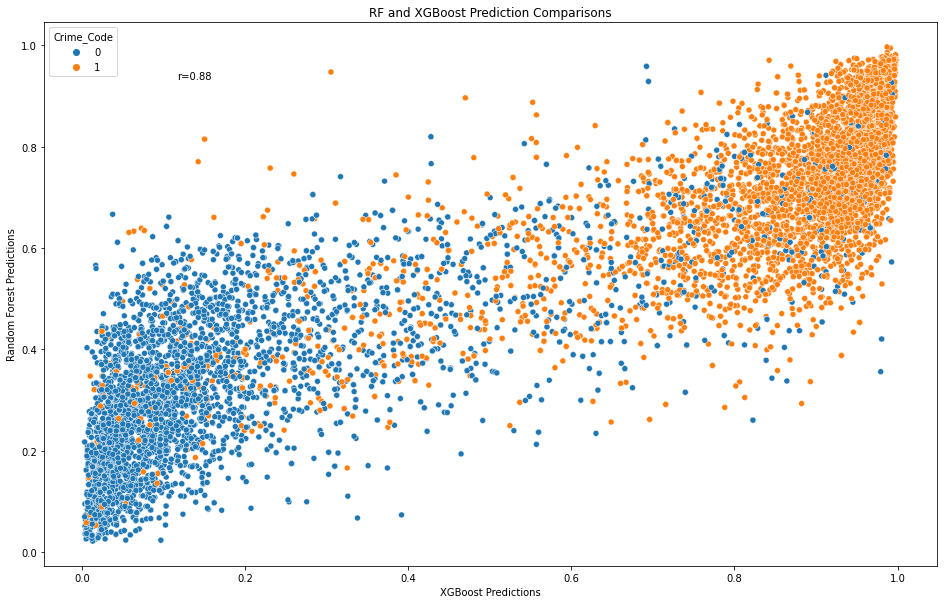

In [107]:
# draw scatter plot comparing random forest predictions with xgboost,
# colored by ground truth (crime code) column
sns.scatterplot(data=pred_comparison, x=pred_comparison['Predictions_XGB'],
                y = pred_comparison['Predictions_RF'], hue='Crime_Code')

plt.title('RF and XGBoost Prediction Comparisons')
plt.xlabel('XGBoost Predictions')
plt.ylabel('Random Forest Predictions')

# call the scipy function for pearson correlation
r, p = sp.stats.pearsonr(x=pred_comparison['Predictions_XGB'],
                y = pred_comparison['Predictions_RF'])
# annotate the pearson correlation coefficient text to 2 decimal places
plt.text(.05, .8, 'r={:.2f}'.format(r),
            transform=ax.transAxes)

# save the prediction comparisons onto image path
plt.savefig(model_image_path + '/pred_comparisons_colored.png', bbox_inches = 'tight')
plt.show()

*Note.* Both models predictions are comparable at a Pearson correlation coefficient of *r*=0.84. Blue represents less serious crimes and orange represents more serious crimes. 

## XGBoost: Deployment - Training and Predicting on The Test Set

In [108]:
# read in the test set from path
test_set = pd.read_csv(test_path).set_index('OBJECTID')

In [109]:
# subset the inputs for test set (X_test, y_test, respectively) as 
# only input features, omitting the crime code truthing columns.
X_test = test_set.drop(columns=['Crime_Code'])
y_test = pd.DataFrame(test_set['Crime_Code']) # crime code as truthing column

In [110]:
# train and predict final XGBoost model on test set
xgb_final_test = XGBClassifier(max_depth=31, lr=0.5, random_state=rstate)
xgb_final_test.fit(X_train, y_train) # fit the classifier
xgb_final_test_pred = xgb_final_test.predict(X_test) # Predict on val set
# extract predicted probabilities for validation set
xgb_final_test_proba = xgb_final_test.predict_proba(X_test)[:, 1]

In [111]:
# create copy of validation set to join xgb model predictions to
df_predictions_xgb_final = test_set.copy()
# join the xgb model predictions to validation set copy
df_preds_xgb_final = pd.concat([X_test, y_test], axis=1)
df_preds_xgb_final['Predictions'] = xgb_final_test_proba

In [112]:
df_preds_xgb_final.head() # inspect the final dataframe

,77th_Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N_Hollywood,Newton,...,Park_Playground,Parking_Lot,Sidewalk,Street,Vacant_Lot,Vict_Age,Month_No,Gender,Crime_Code,Predictions
OBJECTID,,,,,,,,,,,,,,,,,,,,,
138589,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,47,5,2,1,0.70
23252,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,20,4,1,0,0.07
13020,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,43,2,2,0,0.99
115827,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,14,5,1,0,0.04
199706,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,70,6,2,1,0.92


In [113]:
# write out the xgboost predictions to file on path
df_preds_xgb_final.to_csv(data_folder + 'df_preds_xgb_final.csv')

**References**

Bura, D., Singh, M., & Nandal, P. (2019). Predicting Secure and Safe Route for Women using Google Maps. *2019 International Conference on Machine Learning, Big Data, Cloud and Parallel Computing (COMITCon).* https://doi.org/10.1109/comitcon.2019  

Chen T. & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.* 785-794. https://doi.org/10.1145/2939672.2939785  

City of Los Angeles. (2022). *Street Centerline* [Data set]. Los Angeles Open Data. https://data.lacity.org/City-Infrastructure-Service-Requests/Street-Centerline/7j4e-nn4z  

City of Los Angeles. (2022). *City Boundaries for Los Angeles County* [Data set]. Los Angeles Open Data. https://controllerdata.lacity.org/dataset/City-Boundaries-for-Los-Angeles-County/sttr-9nxz  

Kuhn, M., & Johnson, K. (2016). *Applied Predictive Modeling.* Springer. https://doi.org/10.1007/978-1-4614-6849-3  

Levy, S., Xiong, W., Belding, E., & Wang, W. Y. (2020). *SafeRoute: Learning to Navigate Streets Safely in an Urban Environment. ACM Transactions on Intelligent Systems and Technology, 11*(6), 1-17. https://doi.org/10.1145/3402818  

Lopez, G., 2022, April 17. A Violent Crisis. *The New York Times.* https://www.nytimes.com/2022/04/17/briefing/violent-crime-ukraine-war-week-ahead.html.  

Los Angeles Police Department. (2022). *Crime Data from 2020 to Present* [Data set]. https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8  

Pavate, A., Chaudhari, A., & Bansode, R. (2019). Envision of Route Safety Direction Using Machine Learning. *Acta Scientific Medical Sciences, 3*(11), 140–145. https://doi.org/10.31080/asms.2019.03.0452  

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., and Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12(Oct), 2825–2830.  

Tarkelar, S., Bhat, A., Pandhe, S., & Halarnkar, T. (2016). Algorithm to Determine the Safest Route. *(IJCSIT) International Journal of Computer Science and Information Technologies, 7*(3), 2016, 1536-1540. http://ijcsit.com/docs/Volume%207/vol7issue3/ijcsit20160703106.pdf  

Vandeviver, C. (2014). Applying Google Maps and Google Street View in criminological research. *Crime Science, 3*(1). https://doi.org/10.1186/s40163-014-0013-2  

Wang, Y. Li, Y., Yong S., Rong, X., Zhang, S. (2017). Improvement of ID3 algorithm based on simplified information entropy and coordination degree. *2017 Chinese Automation Congress (CAC)*, 1526-1530. https://doi.org/10.1109/CAC.2017.8243009
